In [1]:
%%capture
%%configure -f
{"name":"Nacho Riaño - Formación Spark Dataframes",
"executorCores":3,
"numExecutors":3}

# Dataframes

# Creación de Dataframes


## Creación desde diccionario

In [2]:
datos = [
    {"nombre": "Alberto", "apellido": "Sanz ", "email": 'alberto_sanz@hotmail.com'},
    {"nombre": " Antonio", "apellido": "Perez", "email": 'a.perez@gmail.com'},
]

dataframe = sc.parallelize(datos).toDF()

dataframe.show()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2196,application_1520861122949_2263,pyspark3,idle,Link,Link,✔


SparkSession available as 'spark'.
+--------+--------------------+--------+
|apellido|               email|  nombre|
+--------+--------------------+--------+
|   Sanz |alberto_sanz@hotm...| Alberto|
|   Perez|   a.perez@gmail.com| Antonio|
+--------+--------------------+--------+

/usr/hdp/current/spark2-client/python/pyspark/sql/session.py:340: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "

---
**Ejercicio**   
Usando la técnica arriba indicada, crea un dataframe que contenga estos datos:


| **Marca** 	| **Modelo** 	| **Matricula** 	| **Año** 	|
|-----------	|------------	|---------------	|---------	|
| Opel      	| Corsa      	| OC-123        	| 2016   	|
| Renault   	| Clio       	| RC-123        	| 2016    	|
| Ford      	| mondeo     	| FM-345        	| 2014    	|
| Ford      	| Ka         	| FK-235        	| 2015    	|
| Ford      	| Focus      	| FF-567        	| 2018    	|
| Toyota    	| auris      	| TA-890        	| 2017    	|
| Seat      	| Ibiza      	| SI-658        	| 2016    	|
| Ford      	| Focus      	| FF-848        	| 2016    	|

---
***

In [3]:
datos_modelos = [
    {"Marca": "Opel", "Modelo": "Corsa", "Matricula": 'OC-123', 'Año': '2016'},
    {"Marca": "Renault", "Modelo": "Clio", "Matricula": 'RC-123', 'Año': '2016'},
    {"Marca": "Ford", "Modelo": "mondeo", "Matricula": 'FM-345', 'Año': '2014'},
    {"Marca": "Ford", "Modelo": "Ka", "Matricula": 'FK-235', 'Año': '2015'},
    {"Marca": "Ford", "Modelo": "Focus", "Matricula": 'FF-567', 'Año': '2018'},
    {"Marca": "Toyota", "Modelo": "auris", "Matricula": 'TA-890', 'Año': '2017'},
    {"Marca": "Seat", "Modelo": "Ibiza", "Matricula": 'SI-658', 'Año': '2016'},
    {"Marca": "Ford", "Modelo": "Focus", "Matricula": 'FF-848', 'Año': '2016'},

]

modelos = sc.parallelize(datos_modelos).toDF()

modelos.show()

+----+-------+---------+------+
| Año|  Marca|Matricula|Modelo|
+----+-------+---------+------+
|2016|   Opel|   OC-123| Corsa|
|2016|Renault|   RC-123|  Clio|
|2014|   Ford|   FM-345|mondeo|
|2015|   Ford|   FK-235|    Ka|
|2018|   Ford|   FF-567| Focus|
|2017| Toyota|   TA-890| auris|
|2016|   Seat|   SI-658| Ibiza|
|2016|   Ford|   FF-848| Focus|
+----+-------+---------+------+

## Creación desde lista de tuplas

In [4]:
# Dataframe desde lista de tuplas, con esquema explícito (sólo nombres de columnas)

datos = [
  ("Alberto", "Sanz"),
  ("Antonio", "Perez")
]

esquema = ("nombre", "apellido")

dataframe = sc.parallelize(datos).toDF(esquema)

dataframe.show()

+-------+--------+
| nombre|apellido|
+-------+--------+
|Alberto|    Sanz|
|Antonio|   Perez|
+-------+--------+

---  


**Ejercicio**   
Usando la técnica arriba indicada, crea un dataframe que contenga estos datos:


| **Peso** | **Año** | **Matricula** |
|----------|---------|---------------|
| 1200     | 2017    | OC-123        |
| 1300     | 2015    | RC-123        |
| 1500     | 2015    | FM-345        |
| 1200     | 2013    | FK-235        |
| 1300     | 2017    | FF-567        |
| 1300     | 2016    | FF-848        |
| 1250     | 2018    | TA-890        |
| 1100     | 2018    | SI-658        |


---
***

In [5]:
# Dataframe desde lista de tuplas, con esquema explícito (sólo nombres de columnas)

datos_pesos = [
  ("1200", "2017", "OC-123"),
  ("1300", "2015", "RC-123"),
  ("1500", "2015", "FM-345"),
  ("1200", "2013", "FK-235"),
  ("1300", "2017", "FF-567"),
  ("1300", "2016", "FF-848"),
  ("1250", "2018", "TA-890"),
  ("1100", "2018", "SI-658")
]

esquema = ("Peso", "Año", "Matricula")

pesos = sc.parallelize(datos_pesos).toDF(esquema)

pesos.show()

+----+----+---------+
|Peso| Año|Matricula|
+----+----+---------+
|1200|2017|   OC-123|
|1300|2015|   RC-123|
|1500|2015|   FM-345|
|1200|2013|   FK-235|
|1300|2017|   FF-567|
|1300|2016|   FF-848|
|1250|2018|   TA-890|
|1100|2018|   SI-658|
+----+----+---------+

## Creación desde fichero externo

In [6]:
# Cargar fichero CSV como Dataframe

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

df = sqlContext.read\
      .format('com.databricks.spark.csv')\
      .options(header='true', inferschema='true',delimiter=';',mode='FAILFAST')\
      .load('adl://barcelodatalake.azuredatalakestore.net/pruebas/Nacho/Pruebas_Email_Ordering')

df.select('NOMBRE','APELLIDOS','EMAIL_1').show()


+------------+-------------+---------+
|      NOMBRE|    APELLIDOS|  EMAIL_1|
+------------+-------------+---------+
|        null|         null|a1@a1.com|
|    marticia| banks booker|     null|
|     andrzej|       paluch|a2@a2.com|
|        null|         null|     null|
|      sandra|     chianese|b2@b2.com|
|luis alberto|mora almendro|c2@c2.com|
|       dylan|    burzinski|     null|
|        null|         null|a3@a3.com|
|        gleb|      malygin|b3@b3.com|
|        ivan| garcia pardo|a3@a3.com|
|        ivan| garcia pardo|a3@a3.com|
|        ivan| garcia pardo|     null|
|        ivan| garcia pardo|a3@a3.com|
|        ivan| garcia pardo|c3@c3.com|
|        ivan| garcia pardo|     null|
|        ivan| garcia pardo|a4@a4.com|
|        ivan| garcia pardo|a4@a4.com|
|        ivan| garcia pardo|a4@a4.com|
|        ivan| garcia pardo|b4@b4.com|
|        ivan| garcia pardo|a4@a4.com|
+------------+-------------+---------+
only showing top 20 rows

---  


**Ejercicio**   
Usando la técnica arriba indicada, cargar un dataframe alojado en el datalake en la ruta:
`adl://barcelodatalake.azuredatalakestore.net/pruebas/formacion_abril_2018/coches.csv`

¿Qué pasa con la tilde de la columna transmisión? 

Pista: Cargar con encoding latin1

---


In [7]:
# Cargar fichero CSV como Dataframe

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

coches = sqlContext.read\
      .format('com.databricks.spark.csv')\
      .options(header='true',encoding='latin1' , inferschema='true',delimiter=';',mode='FAILFAST')\
      .load('adl://barcelodatalake.azuredatalakestore.net/pruebas/formacion_abril_2018/coches.csv')


modelos = sqlContext.read\
      .format('com.databricks.spark.csv')\
      .options(header='true',encoding='latin1' , inferschema='true',delimiter=';',mode='FAILFAST')\
      .load('adl://barcelodatalake.azuredatalakestore.net/pruebas/formacion_abril_2018/modelos.csv')


pesos = sqlContext.read\
      .format('com.databricks.spark.csv')\
      .options(header='true',encoding='latin1' , inferschema='true',delimiter=';',mode='FAILFAST')\
      .load('adl://barcelodatalake.azuredatalakestore.net/pruebas/formacion_abril_2018/peso.csv')


In [8]:
coches.show()
modelos.show()
pesos.show()

+---------+--------+--------+--------------------+-----+
|Matricula|   Color|Potencia|         Transmision|   CP|
+---------+--------+--------+--------------------+-----+
|  OC-123 |    Rojo|      90|              Manual|47002|
|     null|   Verde|      75|          Automatico|47002|
|  FM-345 |    Rojo|     110|              Manual|47002|
|   FK-235|    Azul|    -100|          Automatico|96574|
|   xx-xxx|    Azul|     105|              Manual|96574|
|  TA-890 |    Rojo|     150|Semiautomático co...|96574|
|  SI-658 |    Gris|     100|              Manual|65214|
|   FF-848|Amarillo|      90|              Manual|52468|
+---------+--------+--------+--------------------+-----+

+-------+------+---------+----+
|  Marca|Modelo|Matricula| Año|
+-------+------+---------+----+
|   Opel| Corsa|   OC-123|2016|
|Renault|  Clio|   RC-123|2016|
|   Ford|mondeo|   FM-345|2014|
|   Ford|    Ka|   FK-235|2015|
|   Ford| Focus|   FF-567|2018|
| Toyota| auris|   TA-890|2017|
|   Seat| Ibiza|   SI-658|2

## Creación avanzada con esquema

In [9]:
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType


nombres = [
  ("DNI-1",  "Wade Owen, alias Parzival", "Wade Owen", 28080),
  (None,         "Anonimo Sin DNI"          , None,    47001),
  ("DNI-2",  "  Amelia ",  "Pond",    28080),
  ("DNI-3",  "Geddy",    None,     24001),
  ("DNI-4",  "Andy",    'Jonshon',     24021),
  ("DNI-5",  "Pamela ",    'Hudson',     24001),
  ("DNI-6",  "  German",    '',     24001),
  ("DNI-7",  "Jacob",    'Ale',     24001),
  ("DNI-98",  "Ender",   "Wiggin",  28080),
  ("DNI-98",  "Ender",   "Wiggin",  28080)
  
]

columnas=["DNI", "NOMBRE", "APELLIDO","CODIGO POSTAL"]
nombresDF = sc.parallelize(nombres).toDF(columnas)

nombresDF.show()



info = [
  ("DNI-1", 65, "Masculino" ),
  ("DNI-2", 25, "Femenino"),
  ("DNI-3", 15, "Masculino"),
  ("DNI-3", 25, "Masculino"),
  ("DNI-4", 43, "Masculino"),
  ("DNI-5", 36, "Femenino"),
  ("DNI-6", -1, "Masculino"),
  ("DNI-7", 25, "Masculino"),
  ("DNI-1000", None, "Masculino" ),
  (None, None, "Robot" ),
  (None, None, "Alien" ),
    
]

infoRDD = sc.parallelize(info)
esquema=StructType([
        StructField(name="DNI", dataType=StringType(), nullable=True),
        StructField(name="EDAD", dataType=IntegerType(), nullable=True),
        StructField(name="GENERO", dataType=StringType(), nullable=True),     
])

infoDF=sqlContext.createDataFrame(infoRDD,esquema)
infoDF.show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-1|  65|Masculino|
|   DNI-2|  25| Femenino|
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-4|  43|Masculino|
|   DNI-5|  36| Femenino|
|   DNI-6

# Obteniendo información

## Obteniendo información - Datos: show(numero registros, truncate)

In [10]:
nombresDF.show()
nombresDF.show(truncate=False, n=5)
infoDF.show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

+-----+-------------------------+---------+-------------+
|DNI  |NOMBRE                   |APELLIDO |CODIGO POSTAL|
+-----+-------------------------+---------+-------------+
|DNI-1|Wade Owen, alias Parzival|Wade Owen|28080        |
|null |Anon

## Obteniendo información - Datos: describe()

In [11]:
nombresDF.describe().show()
infoDF.describe().show()

+-------+------+--------------------+--------+-----------------+
|summary|   DNI|              NOMBRE|APELLIDO|    CODIGO POSTAL|
+-------+------+--------------------+--------+-----------------+
|  count|     9|                  10|       8|               10|
|   mean|  null|                null|    null|          27934.6|
| stddev|  null|                null|    null|6998.581399112251|
|    min| DNI-1|             Amelia |        |            24001|
|    max|DNI-98|Wade Owen, alias ...|  Wiggin|            47001|
+-------+------+--------------------+--------+-----------------+

+-------+-----+------------------+------+
|summary|  DNI|              EDAD|GENERO|
+-------+-----+------------------+------+
|  count|    9|                 8|    11|
|   mean| null|            29.125|  null|
| stddev| null|19.584523773341324|  null|
|    min|DNI-1|                -1| Alien|
|    max|DNI-7|                65| Robot|
+-------+-----+------------------+------+

---  


**Ejercicio**   
Obtener una previsualizacion del dataset de pesos, visualizando las columnas completas, y calcula cual es el valor máximo, mínimo y media del año de compra

---


In [12]:
pesos.describe().show()

+-------+------------------+------------------+---------+
|summary|              Peso|               Año|Matricula|
+-------+------------------+------------------+---------+
|  count|                 8|                 8|        8|
|   mean|           1268.75|          2016.125|     null|
| stddev|116.30471062809843|1.7268882005338013|     null|
|    min|              1100|              2013|   FF-567|
|    max|              1500|              2018|   TA-890|
+-------+------------------+------------------+---------+

## Obteniendo información  sobre columnas 🡪 columns()

In [13]:
#columns devuelve en formato lista las columnas 
infoDF.columns

['DNI', 'EDAD', 'GENERO']

## Obteniendo información  sobre columnas 🡪 printSchema()

In [14]:
infoDF.printSchema()
nombresDF.printSchema()

root
 |-- DNI: string (nullable = true)
 |-- EDAD: integer (nullable = true)
 |-- GENERO: string (nullable = true)

root
 |-- DNI: string (nullable = true)
 |-- NOMBRE: string (nullable = true)
 |-- APELLIDO: string (nullable = true)
 |-- CODIGO POSTAL: long (nullable = true)

**Ejercicio**   
Obtener el esquema de los 3 dataset generados anteriormente (el generado a partir de un diccionario (modelos), de tuplas (pesos) y cargado desde disco (coches))  
¿Qué pasa con el campo CP?

***


In [15]:
pesos.printSchema()
modelos.printSchema()
coches.printSchema()

root
 |-- Peso: integer (nullable = true)
 |-- Año: integer (nullable = true)
 |-- Matricula: string (nullable = true)

root
 |-- Marca: string (nullable = true)
 |-- Modelo: string (nullable = true)
 |-- Matricula: string (nullable = true)
 |-- Año: integer (nullable = true)

root
 |-- Matricula: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Potencia: integer (nullable = true)
 |-- Transmision: string (nullable = true)
 |-- CP: integer (nullable = true)

## Obteniendo un número determinado de rows del dataset 🡪  limit()

In [16]:
infoDF.limit(2).show()

+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-1|  65|Masculino|
|DNI-2|  25| Femenino|
+-----+----+---------+

## Obteniendo información sobre filas 🡪  count()

In [17]:
infoDF.count()

11

## Obteniendo información sobre un rdd 🡪  isEmpty()

In [20]:
infoDF.rdd.isEmpty()

False

**Ejercicio**   
Obtener el número de registros del último dataset, el de coches, que ha sido cargado desde el datalake
***


In [21]:
coches.count()

8

# Paso de dataframe a otros formatos

## Dataframe a lista de diccionarios

In [22]:
import pprint
list_of_dict=infoDF.rdd.map(lambda row: row.asDict()).collect()

pprint.pprint(list_of_dict)

[{'DNI': 'DNI-1', 'EDAD': 65, 'GENERO': 'Masculino'},
 {'DNI': 'DNI-2', 'EDAD': 25, 'GENERO': 'Femenino'},
 {'DNI': 'DNI-3', 'EDAD': 15, 'GENERO': 'Masculino'},
 {'DNI': 'DNI-3', 'EDAD': 25, 'GENERO': 'Masculino'},
 {'DNI': 'DNI-4', 'EDAD': 43, 'GENERO': 'Masculino'},
 {'DNI': 'DNI-5', 'EDAD': 36, 'GENERO': 'Femenino'},
 {'DNI': 'DNI-6', 'EDAD': -1, 'GENERO': 'Masculino'},
 {'DNI': 'DNI-7', 'EDAD': 25, 'GENERO': 'Masculino'},
 {'DNI': 'DNI-1000', 'EDAD': None, 'GENERO': 'Masculino'},
 {'DNI': None, 'EDAD': None, 'GENERO': 'Robot'},
 {'DNI': None, 'EDAD': None, 'GENERO': 'Alien'}]

## Dataframe de Spark a dataframe de Pandas

In [23]:
import pprint
list_of_dict=infoDF.toPandas()

pprint.pprint(list_of_dict)

         DNI  EDAD     GENERO
0      DNI-1  65.0  Masculino
1      DNI-2  25.0   Femenino
2      DNI-3  15.0  Masculino
3      DNI-3  25.0  Masculino
4      DNI-4  43.0  Masculino
5      DNI-5  36.0   Femenino
6      DNI-6  -1.0  Masculino
7      DNI-7  25.0  Masculino
8   DNI-1000   NaN  Masculino
9       None   NaN      Robot
10      None   NaN      Alien

## Lista de los valores en una columna

In [24]:
infoDF.select("DNI").rdd.collect()

[Row(DNI='DNI-1'), Row(DNI='DNI-2'), Row(DNI='DNI-3'), Row(DNI='DNI-3'), Row(DNI='DNI-4'), Row(DNI='DNI-5'), Row(DNI='DNI-6'), Row(DNI='DNI-7'), Row(DNI='DNI-1000'), Row(DNI=None), Row(DNI=None)]

In [25]:
infoDF.select("DNI").rdd.map(lambda x: x['DNI']).collect()

['DNI-1', 'DNI-2', 'DNI-3', 'DNI-3', 'DNI-4', 'DNI-5', 'DNI-6', 'DNI-7', 'DNI-1000', None, None]

In [26]:
infoDF.select("DNI").rdd.flatMap(lambda x: x).collect()

['DNI-1', 'DNI-2', 'DNI-3', 'DNI-3', 'DNI-4', 'DNI-5', 'DNI-6', 'DNI-7', 'DNI-1000', None, None]

**Ejercicio**   
Obtener las columnas comunes a los 3 datasets (coches, modelos, pesos)  
Pista: convertir a rdd y usar la funcion intersect
***


In [28]:
columnas_modelos = sc.parallelize(modelos.columns)
columnas_coches = sc.parallelize(coches.columns)
columnas_pesos = sc.parallelize(pesos.columns)
print('Columnas comunes entre Modelos-Coches',columnas_modelos.intersection(columnas_coches).collect())
print('Columnas comunes entre Modelos-Pesos',columnas_modelos.intersection(columnas_pesos).collect())
print('Columnas comunes entre Pesos-Coches',columnas_pesos.intersection(columnas_coches).collect())


Columnas comunes entre Modelos-Coches ['Matricula']
Columnas comunes entre Modelos-Pesos ['Matricula', 'Año']
Columnas comunes entre Pesos-Coches ['Matricula']

# Filtrando información

## Elegir algunas columnas 🡪  select()

In [29]:
selection = nombresDF.select("NOMBRE")
print("Select devuelve: %s" % selection)
selection.show()

Select devuelve: DataFrame[NOMBRE: string]
+--------------------+
|              NOMBRE|
+--------------------+
|Wade Owen, alias ...|
|     Anonimo Sin DNI|
|             Amelia |
|               Geddy|
|                Andy|
|             Pamela |
|              German|
|               Jacob|
|               Ender|
|               Ender|
+--------------------+

**Ejercicio**   
Seleccionar la columna de llamada 'Matricula' de cada una de las tres tablas cargadas (coches, modelos, pesos)
***


In [30]:
coches.select('Matricula').show()

+---------+
|Matricula|
+---------+
|  OC-123 |
|     null|
|  FM-345 |
|   FK-235|
|   xx-xxx|
|  TA-890 |
|  SI-658 |
|   FF-848|
+---------+

## Elegir algunas filas 🡪  where() o filter()

In [36]:
#se importan la librería de funciones de pyspark
import pyspark.sql.functions as f

### Condición estilo Python

In [31]:
colname="EDAD"
infoDF.where(infoDF[colname] < 30).show() # <--- Forma recomendada
infoDF.where(infoDF.EDAD < 30).show() 


+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-2|  25| Femenino|
|DNI-3|  15|Masculino|
|DNI-3|  25|Masculino|
|DNI-6|  -1|Masculino|
|DNI-7|  25|Masculino|
+-----+----+---------+

+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-2|  25| Femenino|
|DNI-3|  15|Masculino|
|DNI-3|  25|Masculino|
|DNI-6|  -1|Masculino|
|DNI-7|  25|Masculino|
+-----+----+---------+

In [38]:
infoDF.show()

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-1|  65|Masculino|
|   DNI-2|  25| Femenino|
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-4|  43|Masculino|
|   DNI-5|  36| Femenino|
|   DNI-6|  -1|Masculino|
|   DNI-7|  25|Masculino|
|DNI-1000|null|Masculino|
|    null|null|    Robot|
|    null|null|    Alien|
+--------+----+---------+

In [100]:
infoDF.where(f.col('EDAD').like('25')).show() 
infoDF.where(f.col('GENERO').isin(['Masculino', 'Femenino'])).show() 


+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-2|  25| Femenino|
|DNI-3|  25|Masculino|
|DNI-7|  25|Masculino|
+-----+----+---------+

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-1|  65|Masculino|
|   DNI-2|  25| Femenino|
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-4|  43|Masculino|
|   DNI-5|  36| Femenino|
|   DNI-6|  -1|Masculino|
|   DNI-7|  25|Masculino|
|DNI-1000|null|Masculino|
+--------+----+---------+

**Ejercicio**   
Sobre el dataset de modelos, obtener la matrícula de todos los coches de la marca Ford
***


In [101]:
modelos.where(f.col('Marca').like('Ford')).select('Matricula').show()

+---------+
|Matricula|
+---------+
|   FM-345|
|   FK-235|
|   FF-567|
|   FF-848|
+---------+

### Condición estilo SQL

In [102]:
infoDF.where("EDAD < 30").show() 
infoDF.filter("EDAD < 30").show() 

+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-2|  25| Femenino|
|DNI-3|  15|Masculino|
|DNI-3|  25|Masculino|
|DNI-6|  -1|Masculino|
|DNI-7|  25|Masculino|
+-----+----+---------+

+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-2|  25| Femenino|
|DNI-3|  15|Masculino|
|DNI-3|  25|Masculino|
|DNI-6|  -1|Masculino|
|DNI-7|  25|Masculino|
+-----+----+---------+

**Ejercicio**   
Sobre el dataset coches, obtener la matrícula de todos los coches con potencia mayor a 100 caballos
***


In [103]:
coches.where("Potencia > 100").select('Matricula').show()

+---------+
|Matricula|
+---------+
|  FM-345 |
|   xx-xxx|
|  TA-890 |
+---------+

### Condiciones null / not null

In [104]:
nombresDF.where(nombresDF["DNI"].isNull() ).show()
nombresDF.where("DNI is NULL").show()

+----+---------------+--------+-------------+
| DNI|         NOMBRE|APELLIDO|CODIGO POSTAL|
+----+---------------+--------+-------------+
|null|Anonimo Sin DNI|    null|        47001|
+----+---------------+--------+-------------+

+----+---------------+--------+-------------+
| DNI|         NOMBRE|APELLIDO|CODIGO POSTAL|
+----+---------------+--------+-------------+
|null|Anonimo Sin DNI|    null|        47001|
+----+---------------+--------+-------------+


**Ejercicio**   
Sobre el dataset de coches, comprobar si existe algun registro cuya matrícula sea None, mostrarlos por pantalla y contar cuantos hay
***


In [105]:
coches.where(coches['Matricula'].isNull()).show()
print('Numero de registros con matricula igual a None: ',coches.where(coches['Matricula'].isNull()).count())

+---------+-----+--------+-----------+-----+
|Matricula|Color|Potencia|Transmision|   CP|
+---------+-----+--------+-----------+-----+
|     null|Verde|      75| Automatico|47002|
+---------+-----+--------+-----------+-----+

Numero de registros con matricula igual a None:  1

### Ejemplo condición más compleja


In [106]:

infoDF.where( (infoDF["EDAD"].isNull()) | ( (infoDF["EDAD"]<30) & (infoDF["GENERO"].like('Ma%')) ) ).show() 
infoDF.where( (infoDF["EDAD"].isNull() | (infoDF["EDAD"]<30)) & (infoDF["GENERO"].like('Ma%')) ).show() 
infoDF.where("EDAD < 30 AND GENERO LIKE 'Ma%'").show()

#Operadores: & , | , ~ , like, rlike, ...

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-6|  -1|Masculino|
|   DNI-7|  25|Masculino|
|DNI-1000|null|Masculino|
|    null|null|    Robot|
|    null|null|    Alien|
+--------+----+---------+

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-6|  -1|Masculino|
|   DNI-7|  25|Masculino|
|DNI-1000|null|Masculino|
+--------+----+---------+

+-----+----+---------+
|  DNI|EDAD|   GENERO|
+-----+----+---------+
|DNI-3|  15|Masculino|
|DNI-3|  25|Masculino|
|DNI-6|  -1|Masculino|
|DNI-7|  25|Masculino|
+-----+----+---------+

**Ejercicio**   
Usando este tipo de condiciones, sobre el dataset de pesos, las matrículas de los coches que pesan mas de 1250 kg y son del 2016 o más recientes. De igual forma hallar las matriculas de los menores de 2016 que cumplen esa condición
***


In [107]:
pesos.where((pesos.Peso > 1250) & (pesos.Año >= 2016)).show()

+----+----+---------+
|Peso| Año|Matricula|
+----+----+---------+
|1300|2017|   FF-567|
|1300|2016|   FF-848|
+----+----+---------+

### Ejemplo condición usando expresiones regulares: rlike


In [108]:
infoDF.where(infoDF["GENERO"].rlike('(?i).*E.*')).show() 

+-----+----+--------+
|  DNI|EDAD|  GENERO|
+-----+----+--------+
|DNI-2|  25|Femenino|
|DNI-5|  36|Femenino|
| null|null|   Alien|
+-----+----+--------+

**Ejercicio**   
Sobre el dataframe de modelos, obtener los registros cuyos modelos acaben en vocal  
Expresion regular: '(?i)[AEIOU]$'
***


In [109]:
modelos.where(modelos['Modelo'].rlike('(?i)[AEIOU]$')).show()

+-------+------+---------+----+
|  Marca|Modelo|Matricula| Año|
+-------+------+---------+----+
|   Opel| Corsa|   OC-123|2016|
|Renault|  Clio|   RC-123|2016|
|   Ford|mondeo|   FM-345|2014|
|   Ford|    Ka|   FK-235|2015|
|   Seat| Ibiza|   SI-658|2016|
+-------+------+---------+----+

# Descarte y rellenado de datos Na/Null

## Descarte de datos 🡪 dropna()

In [110]:
nombresDF.show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [111]:
nombresDF.dropna(subset=['DNI']).show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [112]:
nombresDF.dropna(how='any').show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [113]:
nombresDF.dropna(how='all').show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [114]:
nombresDF.dropna(thresh=3).show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

## Rellenado de datos 🡪 fillna()

In [116]:
infoDF.show()

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-1|  65|Masculino|
|   DNI-2|  25| Femenino|
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-4|  43|Masculino|
|   DNI-5|  36| Femenino|
|   DNI-6|  -1|Masculino|
|   DNI-7|  25|Masculino|
|DNI-1000|null|Masculino|
|    null|null|    Robot|
|    null|null|    Alien|
+--------+----+---------+

In [118]:
edadMedia = infoDF.agg(f.avg("EDAD")).first()[0]

infoDF.show()

infoDF.fillna({
        "EDAD": edadMedia,
        "DNI": "** sin dni **"
    }).show()

+--------+----+---------+
|     DNI|EDAD|   GENERO|
+--------+----+---------+
|   DNI-1|  65|Masculino|
|   DNI-2|  25| Femenino|
|   DNI-3|  15|Masculino|
|   DNI-3|  25|Masculino|
|   DNI-4|  43|Masculino|
|   DNI-5|  36| Femenino|
|   DNI-6|  -1|Masculino|
|   DNI-7|  25|Masculino|
|DNI-1000|null|Masculino|
|    null|null|    Robot|
|    null|null|    Alien|
+--------+----+---------+

+-------------+----+---------+
|          DNI|EDAD|   GENERO|
+-------------+----+---------+
|        DNI-1|  65|Masculino|
|        DNI-2|  25| Femenino|
|        DNI-3|  15|Masculino|
|        DNI-3|  25|Masculino|
|        DNI-4|  43|Masculino|
|        DNI-5|  36| Femenino|
|        DNI-6|  -1|Masculino|
|        DNI-7|  25|Masculino|
|     DNI-1000|  29|Masculino|
|** sin dni **|  29|    Robot|
|** sin dni **|  29|    Alien|
+-------------+----+---------+

** Ejercicio **  
En el dataframe coches, sustituir los nulos en la columna Matricula por 'sin matricula'


In [119]:
coches.fillna({'Matricula': 'sin matricula'}).show()

+-------------+--------+--------+--------------------+-----+
|    Matricula|   Color|Potencia|         Transmision|   CP|
+-------------+--------+--------+--------------------+-----+
|      OC-123 |    Rojo|      90|              Manual|47002|
|sin matricula|   Verde|      75|          Automatico|47002|
|      FM-345 |    Rojo|     110|              Manual|47002|
|       FK-235|    Azul|    -100|          Automatico|96574|
|       xx-xxx|    Azul|     105|              Manual|96574|
|      TA-890 |    Rojo|     150|Semiautomático co...|96574|
|      SI-658 |    Gris|     100|              Manual|65214|
|       FF-848|Amarillo|      90|              Manual|52468|
+-------------+--------+--------+--------------------+-----+

# Agrupacion de datos (GroupBy)

## Distinción entre tipos de Dataframe y GroupedData


In [121]:
print("Tipo de Dataframe sin agrupar: %s" % type(infoDF))
print("Tipo de Dataframe agrupado: %s" % type(infoDF.groupBy("GENERO")))

Tipo de Dataframe sin agrupar: <class 'pyspark.sql.dataframe.DataFrame'>
Tipo de Dataframe agrupado: <class 'pyspark.sql.group.GroupedData'>

## Funciones que se aplican sobre datos agrupados
#### (transformaciones wide)

* approx_count_distinct (tipo agg)
* avg (tipo agg)
* collect_list (tipo agg)
* collect_set (tipo agg)
* countDistinct (tipo agg)
* max (tipo agg)
* mean (tipo agg)
* min (tipo agg)
* pivot (tipo agg)
* sum (tipo agg)
* sumDistinct (tipo agg)

##### aprox_count_distinct (tipo agg)

In [73]:
infoDF.agg(f.approx_count_distinct(infoDF.EDAD).alias('Valores distintos')).collect()

[Row(Valores distintos=6)]

##### avg (tipo agg)

In [251]:
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).collect()

[Row(Media Edad=29.125)]

In [81]:
#si queremos calcularlo con el modulo de las edades
infoDF_moduloEdad = infoDF.withColumn('MODULO_EDAD', f.abs(infoDF.EDAD))

#como row
print(infoDF_moduloEdad.agg(f.avg(infoDF_moduloEdad.MODULO_EDAD).alias('Media Edad')).collect())

#paso a dataframe
infoDF_moduloEdad.agg(f.avg(infoDF_moduloEdad.MODULO_EDAD).alias('Media Edad')).toDF('Media Edad').show()

[Row(Media Edad=30.0)]
+----------+
|Media Edad|
+----------+
|      30.0|
+----------+

##### collect_list (tipo agg)

In [126]:
#columna original 

infoDF.select(col('GENERO')).show()

+---------+
|   GENERO|
+---------+
|Masculino|
| Femenino|
|Masculino|
|Masculino|
|Masculino|
| Femenino|
|Masculino|
|Masculino|
|    Robot|
|    Alien|
+---------+

In [161]:
infoDF.agg(f.collect_list(infoDF.GENERO).alias('Columna GENERO convertida a lista')).toDF('Lista de Generos').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------+
|Lista de Generos                                                                                               |
+---------------------------------------------------------------------------------------------------------------+
|[Masculino, Masculino, Robot, Alien, Masculino, Femenino, Masculino, Masculino, Femenino, Masculino, Masculino]|
+---------------------------------------------------------------------------------------------------------------+

In [ ]:
infoDF.agg(f.collect_list(infoDF.GENERO).alias('Columna GENERO convertida a lista')).toDF('Lista de Generos').show(truncate=False)

In [155]:
nombresDF.show()

+------+--------------------+--------+-------------+
|   DNI|              NOMBRE|APELLIDO|CODIGO POSTAL|
+------+--------------------+--------+-------------+
| DNI-1|Wade Owen, alias ...|   Watts|        28080|
|  null|     Anonimo Sin DNI|    null|        47001|
| DNI-2|              Amelia|    Pond|        28080|
| DNI-3|               Geddy|    null|        24001|
| DNI-4|                Andy| Jonshon|        24021|
| DNI-5|              Pamela|  Hudson|        24001|
| DNI-6|              German|        |        24001|
| DNI-7|               Jacob|     Ale|        24001|
|DNI-98|               Ender|  Wiggin|        28080|
|DNI-98|               Ender|  Wiggin|        28080|
+------+--------------------+--------+-------------+

In [159]:
nombresDF.groupBy("CODIGO POSTAL").agg(f.collect_list('DNI').alias("DNI's")).show(truncate=False)

+-------------+------------------------------+
|CODIGO POSTAL|DNI's                         |
+-------------+------------------------------+
|28080        |[DNI-1, DNI-2, DNI-98, DNI-98]|
|24021        |[DNI-4]                       |
|24001        |[DNI-5, DNI-7, DNI-3, DNI-6]  |
|47001        |[]                            |
+-------------+------------------------------+

##### collect_set (tipo agg)

In [160]:
infoDF.agg(f.collect_set(infoDF.GENERO).alias('Columna GENERO convertida a lista')).toDF('Lista de Generos').show(truncate=False)

+-----------------------------------+
|Lista de Generos                   |
+-----------------------------------+
|[Masculino, Femenino, Robot, Alien]|
+-----------------------------------+

In [162]:
infoDF.groupBy("EDAD").agg(f.collect_set('GENERO').alias("Generos")).show(truncate=False)

+----+-------------------------+
|EDAD|Generos                  |
+----+-------------------------+
|65  |[Masculino]              |
|-1  |[Masculino]              |
|null|[Masculino, Robot, Alien]|
|15  |[Masculino]              |
|43  |[Masculino]              |
|25  |[Masculino, Femenino]    |
|36  |[Femenino]               |
+----+-------------------------+

##### countDistinct (tipo agg)

In [174]:
infoDF.agg(f.countDistinct(infoDF.GENERO).alias('Numero de Generos distintos')).show()

+---------------------------+
|Numero de Generos distintos|
+---------------------------+
|                          4|
+---------------------------+

In [178]:
infoDF.groupBy('EDAD').agg(f.countDistinct(infoDF.GENERO).alias('Generos distintos por edad')).show()

+----+--------------------------+
|EDAD|Generos distintos por edad|
+----+--------------------------+
|  65|                         1|
|  -1|                         1|
|null|                         3|
|  15|                         1|
|  43|                         1|
|  25|                         2|
|  36|                         1|
+----+--------------------------+

##### max (tipo agg) (igual que avg)


In [249]:
infoDF.agg(f.mean('EDAD').alias('Media Edad')).show(truncate=False)

+----------+
|Media Edad|
+----------+
|29.125    |
+----------+

##### mean (tipo agg)

In [247]:
nombresDF.agg(f.mean('CODIGO POSTAL').alias('Maximo CP')).show(truncate=False)

+---------+
|Maximo CP|
+---------+
|47001    |
+---------+

##### min (tipo agg)


In [252]:
nombresDF.agg(f.min('CODIGO POSTAL').alias('Minimo CP')).show(truncate=False)

+---------+
|Minimo CP|
+---------+
|24001    |
+---------+

##### pivot (tipo agg)

In [849]:
nombresDF.show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [845]:
infoDF.groupBy("EDAD").pivot("GENERO").agg(count("*")).fillna(0).show()

+----+-----+--------+---------+-----+
|EDAD|Alien|Femenino|Masculino|Robot|
+----+-----+--------+---------+-----+
|  65|    0|       0|        1|    0|
|  -1|    0|       0|        1|    0|
|   0|    1|       0|        1|    1|
|  43|    0|       0|        1|    0|
|  15|    0|       0|        1|    0|
|  25|    0|       1|        2|    0|
|  36|    0|       1|        0|    0|
+----+-----+--------+---------+-----+

##### sum (tipo agg)


In [324]:
nombresDF.withColumn('CIFRAS_DESPUES_0_CP', f.split('CODIGO POSTAL','0+')[1])\
.agg(f.sum('CIFRAS_DESPUES_0_CP')).show(truncate=False)

+------------------------+
|sum(CIFRAS_DESPUES_0_CP)|
+------------------------+
|58.0                    |
+------------------------+

##### sumDistinct (tipo agg)

In [325]:
nombresDF.withColumn('CIFRAS_DESPUES_0_CP', f.split('CODIGO POSTAL','0+')[1])\
.agg(f.sumDistinct('CIFRAS_DESPUES_0_CP')).show(truncate=False)

+---------------------------------+
|sum(DISTINCT CIFRAS_DESPUES_0_CP)|
+---------------------------------+
|30.0                             |
+---------------------------------+

### Ejercicios

**Ejercicio**   
Sobre el dataset de coches, obtener cuánto es la menor y mayor potencia

***


In [35]:
coches.agg(f.max(f.col('Potencia')).alias('Maxima potencia')).show()
coches.agg(f.min(f.col('Potencia')).alias('Potencia minima sin normalizar')).show()
coches.agg(f.min(f.abs(f.col('Potencia'))).alias('Potencia minima')).show()


+---------------+
|Maxima potencia|
+---------------+
|            150|
+---------------+

+------------------------------+
|Potencia minima sin normalizar|
+------------------------------+
|                          -100|
+------------------------------+

+---------------+
|Potencia minima|
+---------------+
|             75|
+---------------+

## Uso de Agg en datos agrupados

In [59]:
# Sobre datos de tipo GroupedData podemos usar funciones como agg, 
# la cuales recibe como parámetros una o más funciones de agregacion (max, min, mean,...)

infoDF.groupBy("GENERO").agg(f.mean("EDAD"), f.max("EDAD")).show()

infoDF.groupBy("GENERO").agg(
        f.mean("EDAD").alias("EDAD PROMEDIO"),
        f.max("EDAD").alias("EDAD MAXIMA"),
    ).show()

+---------+------------------+---------+
|   GENERO|         avg(EDAD)|max(EDAD)|
+---------+------------------+---------+
|    Robot|              null|     null|
| Femenino|              30.5|       36|
|    Alien|              null|     null|
|Masculino|28.666666666666668|       65|
+---------+------------------+---------+

+---------+------------------+-----------+
|   GENERO|     EDAD PROMEDIO|EDAD MAXIMA|
+---------+------------------+-----------+
|    Robot|              null|       null|
| Femenino|              30.5|         36|
|    Alien|              null|       null|
|Masculino|28.666666666666668|         65|
+---------+------------------+-----------+

**Ejercicio**  
Sobre el dataframe de coches, agrupar los datos por el campo código postal (CP) y calcular la suma de la potencia por código postal

In [63]:
coches.show()

+---------+--------+--------+--------------------+-----+
|Matricula|   Color|Potencia|         Transmision|   CP|
+---------+--------+--------+--------------------+-----+
|  OC-123 |    Rojo|      90|              Manual|47002|
|     null|   Verde|      75|          Automatico|47002|
|  FM-345 |    Rojo|     110|              Manual|47002|
|   FK-235|    Azul|    -100|          Automatico|96574|
|   xx-xxx|    Azul|     105|              Manual|96574|
|  TA-890 |    Rojo|     150|Semiautomático co...|96574|
|  SI-658 |    Gris|     100|              Manual|65214|
|   FF-848|Amarillo|      90|              Manual|52468|
+---------+--------+--------+--------------------+-----+

In [64]:
coches.groupBy('CP').agg(f.sum('Potencia').alias('Potencia total por CP')).show()

+-----+---------------------+
|   CP|Potencia total por CP|
+-----+---------------------+
|47002|                  275|
|52468|                   90|
|96574|                  155|
|65214|                  100|
+-----+---------------------+

**Ejercicio**  
Sobre el dataframe de coches, agrupar los datos por el campo código postal (CP) y obtener la máxima y mínima potencia por código postal   

In [71]:
coches.groupBy('CP').agg(f.max('Potencia').alias('Potencia Maxima'), f.min('Potencia').alias('Potencia Minima')).show()

+-----+---------------+---------------+
|   CP|Potencia Maxima|Potencia Minima|
+-----+---------------+---------------+
|47002|            110|             75|
|52468|             90|             90|
|96574|            150|           -100|
|65214|            100|            100|
+-----+---------------+---------------+

**Ejercicio**  
Sobre el dataframe obtenido anteriormente, normalizar la potencia para no poder obtener valores negativos   

In [72]:
coches.groupBy('CP').agg(f.max('Potencia').alias('Potencia Maxima'), f.min(f.abs(f.col('Potencia'))).alias('Potencia Minima')).show()

+-----+---------------+---------------+
|   CP|Potencia Maxima|Potencia Minima|
+-----+---------------+---------------+
|47002|            110|             75|
|52468|             90|             90|
|96574|            150|            100|
|65214|            100|            100|
+-----+---------------+---------------+

## Uso de Agg directamente sobre dataframes

In [77]:
# agg puede usarse de forma directa también sobre Dataframes

nombresDF.agg(f.countDistinct(nombresDF.NOMBRE).alias('Numero de nombres distintos')).show()

print('Media de la columna Edad:', infoDF.agg(f.mean(infoDF.EDAD)).first()[0],' tipo de variable: '\
      , type(infoDF.agg(f.mean(infoDF.EDAD)).first()[0]))

+---------------------------+
|Numero de nombres distintos|
+---------------------------+
|                          9|
+---------------------------+

Media de la columna Edad: 29.125  tipo de variable:  <class 'float'>

**Ejercicio**  
Obtener la potencia media de los vehículos redondeada a dos decimales y almacenarla en una variable que se usará más adelante.  
Prestar atención a que un valor, por error, es negativo (usar función abs)  

Pista: Para extraer el valor numérico se debe convertir el dataframe a rdd y aplicar una función tipo flatMap

In [81]:
potencia_media = coches.agg(f.avg(f.abs(f.col('Potencia'))).alias('Potencia_Media'))\
      .select(f.round(f.col('Potencia_Media'),2).alias('Potencia_Media'))\
      .rdd.flatMap(lambda rdd: rdd).collect()[0]

print('Potencia Media: ', potencia_media)

Potencia Media:  102.5

**Ejercicio**  
Usando el dataset de modelos obtener los siguientes conteos:  
* Cuantos coches tenemos en total

In [82]:
print('Numero de coches: ',modelos.count())

Numero de coches:  8

* Cuantas marcas distintas de coche tenemos

In [84]:
modelos.agg(f.countDistinct('Marca').alias('Numero de marcas distintas')).show()

+--------------------------+
|Numero de marcas distintas|
+--------------------------+
|                         5|
+--------------------------+

* Cuantos modelos distintos (hacerlo de forma distinta al apartado anterior)

In [85]:
print('Numero de modelos distintos: ',modelos.select('Modelo').distinct().count())

Numero de modelos distintos:  7

* Cuantos coches hay de cada marca

In [86]:
modelos.groupBy('Marca').agg(f.count('Modelo').alias('Numero de modelos')).show()

+-------+-----------------+
|  Marca|Numero de modelos|
+-------+-----------------+
|   Seat|                1|
|Renault|                1|
|   Opel|                1|
| Toyota|                1|
|   Ford|                4|
+-------+-----------------+

* Cuantos modelos distintos por cada marca

In [87]:
modelos.groupBy('Marca').agg(f.collect_set('Modelo').alias('Lista de modelos'))\
.withColumn('Numero de modelos distintos', f.size('Lista de modelos')).show()

+-------+-------------------+---------------------------+
|  Marca|   Lista de modelos|Numero de modelos distintos|
+-------+-------------------+---------------------------+
|   Seat|            [Ibiza]|                          1|
|Renault|             [Clio]|                          1|
|   Opel|            [Corsa]|                          1|
| Toyota|            [auris]|                          1|
|   Ford|[Focus, Ka, mondeo]|                          3|
+-------+-------------------+---------------------------+

* Cuantas fechas de compra distinta hay

In [90]:
pesos.agg(f.approx_count_distinct(f.col('Año')).alias('Numero de años diferentes')).show()

+-------------------------+
|Numero de años diferentes|
+-------------------------+
|                        5|
+-------------------------+

**Ejercicio**  
Usando nuevamente el dataset de coches, obtener cuanto se repite cada color por código postal y ordenarlo de mayor a menor

In [92]:
coches_por_cp_color = coches.groupBy('CP','Color').agg(f.count('Color').alias('Conteo por CP y Color'))\
.sort(f.desc('Conteo por CP y Color'))

coches_por_cp_color.show()

+-----+--------+---------------------+
|   CP|   Color|Conteo por CP y Color|
+-----+--------+---------------------+
|96574|    Azul|                    2|
|47002|    Rojo|                    2|
|47002|   Verde|                    1|
|96574|    Rojo|                    1|
|65214|    Gris|                    1|
|52468|Amarillo|                    1|
+-----+--------+---------------------+

**Ejercicio**  
Sobre el dataframe de coches, obtener una tabla en la que la columna vertical sea el código postal y la horizontal el color, y estando poblada por una lista con la potencia de los coches asociados  
Pista: Agrupar por CP y posteriormente pivotar

In [94]:
coches.groupBy('CP').pivot('Color').agg(f.collect_list('Potencia')).show()

+-----+--------+-----------+-----+---------+-----+
|   CP|Amarillo|       Azul| Gris|     Rojo|Verde|
+-----+--------+-----------+-----+---------+-----+
|47002|      []|         []|   []|[90, 110]| [75]|
|52468|    [90]|         []|   []|       []|   []|
|96574|      []|[-100, 105]|   []|    [150]|   []|
|65214|      []|         []|[100]|       []|   []|
+-----+--------+-----------+-----+---------+-----+

## Funciones UDF

## withColumn y funciones  lambda

In [96]:
import pyspark.sql.functions as f

nombreCompletoDF = nombresDF.withColumn("NOMBRE_COMPLETO", f.udf(lambda n, a: str(n)+" "+str(a))(nombresDF["NOMBRE"], nombresDF["APELLIDO"]) )

nombreCompletoDF.show(truncate=False)

+------+-------------------------+---------+-------------+-----------------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_COMPLETO                    |
+------+-------------------------+---------+-------------+-----------------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen, alias Parzival Wade Owen|
|null  |Anonimo Sin DNI          |null     |47001        |Anonimo Sin DNI None               |
|DNI-2 |  Amelia                 |Pond     |28080        |  Amelia  Pond                     |
|DNI-3 |Geddy                    |null     |24001        |Geddy None                         |
|DNI-4 |Andy                     |Jonshon  |24021        |Andy Jonshon                       |
|DNI-5 |Pamela                   |Hudson   |24001        |Pamela  Hudson                     |
|DNI-6 |  German                 |         |24001        |  German                           |
|DNI-7 |Jacob                    |Ale      |24001 

** Ejercicio**  
Usando una función lambda sobre el dataframe de coches, crear una nueva columna basada en 'Transmision', en la que se sustituyan la letra 'a' del principio por un '0'  
Es necesario importar la función de python **sub(_pattern, repl, string_)** de la libreria **re**  (ejecutar: import re)
La expresión regular necesaria es '(?i)^A'  

In [122]:
import re

In [125]:
coches.withColumn('Transmision Tratada', f.udf(lambda transmision: re.sub('(?i)^A','0',transmision))(f.col('Transmision'))).show(truncate=False)

+---------+--------+--------+--------------------------------------+-----+--------------------------------------+
|Matricula|Color   |Potencia|Transmision                           |CP   |Transmision Tratada                   |
+---------+--------+--------+--------------------------------------+-----+--------------------------------------+
|OC-123   |Rojo    |90      |Manual                                |47002|Manual                                |
|null     |Verde   |75      |Automatico                            |47002|0utomatico                            |
|FM-345   |Rojo    |110     |Manual                                |47002|Manual                                |
|FK-235   |Azul    |-100    |Automatico                            |96574|0utomatico                            |
|xx-xxx   |Azul    |105     |Manual                                |96574|Manual                                |
|TA-890   |Rojo    |150     |Semiautomático con transmisión hibrida|96574|Semiautomático

** Ejercicio**  
Usando una función lambda sobre el dataframe de modelos, crear una nueva columna basada en 'Año', en la que a la columna Año se le reste el número de la matrícula.  
Para simplificar la obtención del número de la matrícula, usar la función anterior (sub()) diciendo que sustituya los carácteres no numéricos por ''  
La expresión regular necesaria es '[^0-9]'  

In [128]:
modelos.withColumn('Columna Resultado', f.udf(lambda matricula, año: int(año) - int(re.sub('[^0-9]','',matricula)))\
                   (f.col('Matricula'), f.col('Año'))).show()

+-------+------+---------+----+-----------------+
|  Marca|Modelo|Matricula| Año|Columna Resultado|
+-------+------+---------+----+-----------------+
|   Opel| Corsa|   OC-123|2016|             1893|
|Renault|  Clio|   RC-123|2016|             1893|
|   Ford|mondeo|   FM-345|2014|             1669|
|   Ford|    Ka|   FK-235|2015|             1780|
|   Ford| Focus|   FF-567|2018|             1451|
| Toyota| auris|   TA-890|2017|             1127|
|   Seat| Ibiza|   SI-658|2016|             1358|
|   Ford| Focus|   FF-848|2016|             1168|
+-------+------+---------+----+-----------------+

## withColumn y funciones  definidas externamente

In [137]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def mayor_o_menor(edad):
    if not edad:
        return "Desconocido"
    elif edad < 18:
        return "Menor de edad"
    else:
        return"Mayor de edad"
    


infoDF=infoDF.withColumn("STATUS LEGAL", f.udf(mayor_o_menor)(infoDF["EDAD"]))
infoDF.show()

+--------+----+---------+-------------+
|     DNI|EDAD|   GENERO| STATUS LEGAL|
+--------+----+---------+-------------+
|   DNI-1|  65|Masculino|Mayor de edad|
|   DNI-2|  25| Femenino|Mayor de edad|
|   DNI-3|  15|Masculino|Menor de edad|
|   DNI-3|  25|Masculino|Mayor de edad|
|   DNI-4|  43|Masculino|Mayor de edad|
|   DNI-5|  36| Femenino|Mayor de edad|
|   DNI-6|  -1|Masculino|Menor de edad|
|   DNI-7|  25|Masculino|Mayor de edad|
|DNI-1000|null|Masculino|  Desconocido|
|    null|null|    Robot|  Desconocido|
|    null|null|    Alien|  Desconocido|
+--------+----+---------+-------------+

** Ejercicio**  
Crear una función externa que cree una columna en la que clasifique los vehículos del dataset pesos, de la siguiente forma:
* Si es más nuevo del 2016: "Nuevo"
* Si es más viejo del 2016: "Viejo"  

¿Qué valor asigna Spark para el caso en que año es igual a 2016?


In [138]:
def clasificador_antiguedad(año):
    if año < 2016:
        return 'Viejo'
    elif año > 2016:
        return 'Nuevo'

pesos.withColumn('Categoria', f.udf(clasificador_antiguedad)(pesos.Año)).show()

+----+----+---------+---------+
|Peso| Año|Matricula|Categoria|
+----+----+---------+---------+
|1200|2017|   OC-123|    Nuevo|
|1300|2015|   RC-123|    Viejo|
|1500|2015|   FM-345|    Viejo|
|1200|2013|   FK-235|    Viejo|
|1300|2017|   FF-567|    Nuevo|
|1300|2016|   FF-848|     null|
|1250|2018|   TA-890|    Nuevo|
|1100|2018|   SI-658|    Nuevo|
+----+----+---------+---------+

## Usando withColumn para cambiar el tipo de dato

In [139]:
nombresDF.show()
nombresDF.printSchema()

nombresDF=nombresDF.withColumn("CODIGO POSTAL", nombresDF["CODIGO POSTAL"].cast(StringType()))

nombresDF.show()
nombresDF.printSchema()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

root
 |-- DNI: string (nullable = true)
 |-- NOMBRE: string (nullable = true)
 |-- APELLIDO: string (nullable = true)
 |-- CODIGO POSTAL: string (nullable = true)

+------+--------------------+---------+-------------+
|   DNI|              NOM

## withColumnRenamed

In [140]:
infoDF.withColumnRenamed("GENERO", "SEXO").show()

+--------+----+---------+-------------+
|     DNI|EDAD|     SEXO| STATUS LEGAL|
+--------+----+---------+-------------+
|   DNI-1|  65|Masculino|Mayor de edad|
|   DNI-2|  25| Femenino|Mayor de edad|
|   DNI-3|  15|Masculino|Menor de edad|
|   DNI-3|  25|Masculino|Mayor de edad|
|   DNI-4|  43|Masculino|Mayor de edad|
|   DNI-5|  36| Femenino|Mayor de edad|
|   DNI-6|  -1|Masculino|Menor de edad|
|   DNI-7|  25|Masculino|Mayor de edad|
|DNI-1000|null|Masculino|  Desconocido|
|    null|null|    Robot|  Desconocido|
|    null|null|    Alien|  Desconocido|
+--------+----+---------+-------------+

## Uso de distinct

In [141]:
# Ejemplo distinct

nombresDF.distinct().show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
| DNI-5|             Pamela |   Hudson|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
| DNI-6|              German|         |        24001|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-7|               Jacob|      Ale|        24001|
| DNI-3|               Geddy|     null|        24001|
| DNI-2|             Amelia |     Pond|        28080|
+------+--------------------+---------+-------------+

# Ordenación de datos

In [143]:
# Ejemplo orderBy por dos columnas, asc y desc

infoDF.orderBy(infoDF.EDAD.asc(), infoDF.DNI.desc()).select('EDAD', 'DNI', 'GENERO', 'STATUS LEGAL').show()

+----+--------+---------+-------------+
|EDAD|     DNI|   GENERO| STATUS LEGAL|
+----+--------+---------+-------------+
|null|DNI-1000|Masculino|  Desconocido|
|null|    null|    Robot|  Desconocido|
|null|    null|    Alien|  Desconocido|
|  -1|   DNI-6|Masculino|Menor de edad|
|  15|   DNI-3|Masculino|Menor de edad|
|  25|   DNI-7|Masculino|Mayor de edad|
|  25|   DNI-3|Masculino|Mayor de edad|
|  25|   DNI-2| Femenino|Mayor de edad|
|  36|   DNI-5| Femenino|Mayor de edad|
|  43|   DNI-4|Masculino|Mayor de edad|
|  65|   DNI-1|Masculino|Mayor de edad|
+----+--------+---------+-------------+

In [144]:
infoDF.take(1)

[Row(DNI='DNI-1', EDAD=65, GENERO='Masculino', STATUS LEGAL='Mayor de edad')]

** Ejercicio**  
* Ordenar el dataframe de pesos según el año ascendentemente

In [145]:
pesos.orderBy(pesos.Año.asc()).show()

+----+----+---------+
|Peso| Año|Matricula|
+----+----+---------+
|1200|2013|   FK-235|
|1300|2015|   RC-123|
|1500|2015|   FM-345|
|1300|2016|   FF-848|
|1200|2017|   OC-123|
|1300|2017|   FF-567|
|1250|2018|   TA-890|
|1100|2018|   SI-658|
+----+----+---------+

* Ordenar el dataframe de pesos según el año ascendentemente y según el peso descendente

In [146]:
pesos.orderBy(pesos.Año.asc(), pesos.Peso.desc()).show()

+----+----+---------+
|Peso| Año|Matricula|
+----+----+---------+
|1200|2013|   FK-235|
|1500|2015|   FM-345|
|1300|2015|   RC-123|
|1300|2016|   FF-848|
|1300|2017|   FF-567|
|1200|2017|   OC-123|
|1250|2018|   TA-890|
|1100|2018|   SI-658|
+----+----+---------+

* Una vez ordenado por año y peso, quedarnos solo con 5 registros

In [147]:
pesos.orderBy(pesos.Año.asc(), pesos.Peso.desc()).limit(5).show()

+----+----+---------+
|Peso| Año|Matricula|
+----+----+---------+
|1200|2013|   FK-235|
|1500|2015|   FM-345|
|1300|2015|   RC-123|
|1300|2016|   FF-848|
|1300|2017|   FF-567|
+----+----+---------+

# Modificando y Añadiendo información

## Functions

* abs
* bround
* ceil
* coalesce
* col/column
* concat
* concat_ws
* count
* create_map
* desc
* explode
* first
* isnull
* length
* levenshtein
* lit
* lower
* lpad
* ltrim
* rand
* regexp_extract
* regexp_replace
* round
* rpad
* rtrim
* size
* sort_array
* sort
* split
* trim
* udf
* upper
* when

## withColumn y funciones SQL

In [149]:
import pyspark.sql.functions as f

##### abs

In [150]:
infoDF.withColumn('MODULO EDAD', f.abs(infoDF.EDAD)).show()

+--------+----+---------+-------------+-----------+
|     DNI|EDAD|   GENERO| STATUS LEGAL|MODULO EDAD|
+--------+----+---------+-------------+-----------+
|   DNI-1|  65|Masculino|Mayor de edad|         65|
|   DNI-2|  25| Femenino|Mayor de edad|         25|
|   DNI-3|  15|Masculino|Menor de edad|         15|
|   DNI-3|  25|Masculino|Mayor de edad|         25|
|   DNI-4|  43|Masculino|Mayor de edad|         43|
|   DNI-5|  36| Femenino|Mayor de edad|         36|
|   DNI-6|  -1|Masculino|Menor de edad|          1|
|   DNI-7|  25|Masculino|Mayor de edad|         25|
|DNI-1000|null|Masculino|  Desconocido|       null|
|    null|null|    Robot|  Desconocido|       null|
|    null|null|    Alien|  Desconocido|       null|
+--------+----+---------+-------------+-----------+

##### bround

###### el .5 lo redondea al numero inferior

In [152]:
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).toDF('Media Edad').show()
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.bround(f.col('Media Edad'),2)).toDF('Redondeo 2 decimales Media Edad').show()
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.bround(f.col('Media Edad'),1)).toDF('Redondeo 1 decimales Media Edad').show()
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.bround(f.col('Media Edad'),0)).toDF('Redondeo 0 decimales Media Edad').show()

+----------+
|Media Edad|
+----------+
|    29.125|
+----------+

+-------------------------------+
|Redondeo 2 decimales Media Edad|
+-------------------------------+
|                          29.12|
+-------------------------------+

+-------------------------------+
|Redondeo 1 decimales Media Edad|
+-------------------------------+
|                           29.1|
+-------------------------------+

+-------------------------------+
|Redondeo 0 decimales Media Edad|
+-------------------------------+
|                           29.0|
+-------------------------------+

##### ceil

In [154]:
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).toDF('Media Edad').show()

infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.ceil(f.col('Media Edad'))).toDF('Redondeo superior Media Edad').show()

+----------+
|Media Edad|
+----------+
|    29.125|
+----------+

+----------------------------+
|Redondeo superior Media Edad|
+----------------------------+
|                          30|
+----------------------------+

##### coalesce

In [155]:
infoDF.show()

infoDF.select(f.coalesce(infoDF["EDAD"], infoDF["GENERO"]).alias('Union de columnas EDAD y GENERO con valores no nulos')).show()

+--------+----+---------+-------------+
|     DNI|EDAD|   GENERO| STATUS LEGAL|
+--------+----+---------+-------------+
|   DNI-1|  65|Masculino|Mayor de edad|
|   DNI-2|  25| Femenino|Mayor de edad|
|   DNI-3|  15|Masculino|Menor de edad|
|   DNI-3|  25|Masculino|Mayor de edad|
|   DNI-4|  43|Masculino|Mayor de edad|
|   DNI-5|  36| Femenino|Mayor de edad|
|   DNI-6|  -1|Masculino|Menor de edad|
|   DNI-7|  25|Masculino|Mayor de edad|
|DNI-1000|null|Masculino|  Desconocido|
|    null|null|    Robot|  Desconocido|
|    null|null|    Alien|  Desconocido|
+--------+----+---------+-------------+

+----------------------------------------------------+
|Union de columnas EDAD y GENERO con valores no nulos|
+----------------------------------------------------+
|                                                  65|
|                                                  25|
|                                                  15|
|                                                  25|
|             

##### col/column

In [156]:
infoDF.select(f.col('EDAD')).show()

+----+
|EDAD|
+----+
|  65|
|  25|
|  15|
|  25|
|  43|
|  36|
|  -1|
|  25|
|null|
|null|
|null|
+----+

##### concat

In [157]:
nombreCompletoDF = nombresDF.withColumn("NOMBRE_COMPLETO", f.concat("NOMBRE", f.lit(" "), "APELLIDO"))

nombreCompletoDF.show(truncate=False)

+------+-------------------------+---------+-------------+-----------------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_COMPLETO                    |
+------+-------------------------+---------+-------------+-----------------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen, alias Parzival Wade Owen|
|null  |Anonimo Sin DNI          |null     |47001        |null                               |
|DNI-2 |  Amelia                 |Pond     |28080        |  Amelia  Pond                     |
|DNI-3 |Geddy                    |null     |24001        |null                               |
|DNI-4 |Andy                     |Jonshon  |24021        |Andy Jonshon                       |
|DNI-5 |Pamela                   |Hudson   |24001        |Pamela  Hudson                     |
|DNI-6 |  German                 |         |24001        |  German                           |
|DNI-7 |Jacob                    |Ale      |24001 

##### concat_ws

In [158]:
infoDF.withColumn('GENERO & EDAD', f.concat_ws(' & ', infoDF.GENERO, infoDF.EDAD)).show()

+--------+----+---------+-------------+--------------+
|     DNI|EDAD|   GENERO| STATUS LEGAL| GENERO & EDAD|
+--------+----+---------+-------------+--------------+
|   DNI-1|  65|Masculino|Mayor de edad|Masculino & 65|
|   DNI-2|  25| Femenino|Mayor de edad| Femenino & 25|
|   DNI-3|  15|Masculino|Menor de edad|Masculino & 15|
|   DNI-3|  25|Masculino|Mayor de edad|Masculino & 25|
|   DNI-4|  43|Masculino|Mayor de edad|Masculino & 43|
|   DNI-5|  36| Femenino|Mayor de edad| Femenino & 36|
|   DNI-6|  -1|Masculino|Menor de edad|Masculino & -1|
|   DNI-7|  25|Masculino|Mayor de edad|Masculino & 25|
|DNI-1000|null|Masculino|  Desconocido|     Masculino|
|    null|null|    Robot|  Desconocido|         Robot|
|    null|null|    Alien|  Desconocido|         Alien|
+--------+----+---------+-------------+--------------+

##### count

In [159]:
infoDF.select('GENERO').count()

11

##### create_map

In [162]:
clave_valorDF = infoDF.filter(f.col('DNI').isNotNull()).select(f.create_map("DNI", "GENERO").alias('Clave-valor'))
clave_valorDF.show(truncate=False)

+--------------------------+
|Clave-valor               |
+--------------------------+
|Map(DNI-1 -> Masculino)   |
|Map(DNI-2 -> Femenino)    |
|Map(DNI-3 -> Masculino)   |
|Map(DNI-3 -> Masculino)   |
|Map(DNI-4 -> Masculino)   |
|Map(DNI-5 -> Femenino)    |
|Map(DNI-6 -> Masculino)   |
|Map(DNI-7 -> Masculino)   |
|Map(DNI-1000 -> Masculino)|
+--------------------------+

##### explode


In [163]:
clave_valorDF.select(f.explode('Clave-valor').alias("DNI_SEPARADO", 'GENERO_SEPARADO')).show(truncate=False)

+------------+---------------+
|DNI_SEPARADO|GENERO_SEPARADO|
+------------+---------------+
|DNI-1       |Masculino      |
|DNI-2       |Femenino       |
|DNI-3       |Masculino      |
|DNI-3       |Masculino      |
|DNI-4       |Masculino      |
|DNI-5       |Femenino       |
|DNI-6       |Masculino      |
|DNI-7       |Masculino      |
|DNI-1000    |Masculino      |
+------------+---------------+

##### first

In [164]:
infoDF.first()

Row(DNI='DNI-1', EDAD=65, GENERO='Masculino', STATUS LEGAL='Mayor de edad')

##### isnull

In [165]:
infoDF.select('DNI', f.isnull('DNI').alias('DNI es nulo?')).show()

+--------+------------+
|     DNI|DNI es nulo?|
+--------+------------+
|   DNI-1|       false|
|   DNI-2|       false|
|   DNI-3|       false|
|   DNI-3|       false|
|   DNI-4|       false|
|   DNI-5|       false|
|   DNI-6|       false|
|   DNI-7|       false|
|DNI-1000|       false|
|    null|        true|
|    null|        true|
+--------+------------+

##### length

In [166]:
nombresDF.withColumn('LONGITUD_NOMBRE', f.length('NOMBRE')).show(truncate=False)

+------+-------------------------+---------+-------------+---------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|LONGITUD_NOMBRE|
+------+-------------------------+---------+-------------+---------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |25             |
|null  |Anonimo Sin DNI          |null     |47001        |15             |
|DNI-2 |  Amelia                 |Pond     |28080        |9              |
|DNI-3 |Geddy                    |null     |24001        |5              |
|DNI-4 |Andy                     |Jonshon  |24021        |4              |
|DNI-5 |Pamela                   |Hudson   |24001        |7              |
|DNI-6 |  German                 |         |24001        |8              |
|DNI-7 |Jacob                    |Ale      |24001        |5              |
|DNI-98|Ender                    |Wiggin   |28080        |5              |
|DNI-98|Ender                    |Wiggin   |28080        |5              |
+------+-----------------

##### levenshtein

In [167]:
nombresDF.withColumn('Distancia_Levestein_entre Nombres_Apellidos', f.levenshtein('NOMBRE', 'APELLIDO')).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|Distancia_Levestein_entre Nombres_Apellidos|
+------+-------------------------+---------+-------------+-------------------------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |16                                         |
|null  |Anonimo Sin DNI          |null     |47001        |null                                       |
|DNI-2 |  Amelia                 |Pond     |28080        |9                                          |
|DNI-3 |Geddy                    |null     |24001        |null                                       |
|DNI-4 |Andy                     |Jonshon  |24021        |6                                          |
|DNI-5 |Pamela                   |Hudson   |24001        |7                                          |
|DNI-6 |  German                 |         |24001        |8              

##### lit

In [168]:
infoDF.withColumn('Columna_valores_literales', f.lit('Campo_Extra')).show()

+--------+----+---------+-------------+-------------------------+
|     DNI|EDAD|   GENERO| STATUS LEGAL|Columna_valores_literales|
+--------+----+---------+-------------+-------------------------+
|   DNI-1|  65|Masculino|Mayor de edad|              Campo_Extra|
|   DNI-2|  25| Femenino|Mayor de edad|              Campo_Extra|
|   DNI-3|  15|Masculino|Menor de edad|              Campo_Extra|
|   DNI-3|  25|Masculino|Mayor de edad|              Campo_Extra|
|   DNI-4|  43|Masculino|Mayor de edad|              Campo_Extra|
|   DNI-5|  36| Femenino|Mayor de edad|              Campo_Extra|
|   DNI-6|  -1|Masculino|Menor de edad|              Campo_Extra|
|   DNI-7|  25|Masculino|Mayor de edad|              Campo_Extra|
|DNI-1000|null|Masculino|  Desconocido|              Campo_Extra|
|    null|null|    Robot|  Desconocido|              Campo_Extra|
|    null|null|    Alien|  Desconocido|              Campo_Extra|
+--------+----+---------+-------------+-------------------------+

In [169]:
#si hacemos esto sin usar el lit() devolvera un error
infoDF.withColumn('Columna_valores_literales', 'Campo_Extra').show()

col should be Column
Traceback (most recent call last):
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/dataframe.py", line 1501, in withColumn
    assert isinstance(col, Column), "col should be Column"
AssertionError: col should be Column



##### lower


In [170]:
infoDF.withColumn('DNI_minusculas', f.lower(infoDF.DNI)).show()

+--------+----+---------+-------------+--------------+
|     DNI|EDAD|   GENERO| STATUS LEGAL|DNI_minusculas|
+--------+----+---------+-------------+--------------+
|   DNI-1|  65|Masculino|Mayor de edad|         dni-1|
|   DNI-2|  25| Femenino|Mayor de edad|         dni-2|
|   DNI-3|  15|Masculino|Menor de edad|         dni-3|
|   DNI-3|  25|Masculino|Mayor de edad|         dni-3|
|   DNI-4|  43|Masculino|Mayor de edad|         dni-4|
|   DNI-5|  36| Femenino|Mayor de edad|         dni-5|
|   DNI-6|  -1|Masculino|Menor de edad|         dni-6|
|   DNI-7|  25|Masculino|Mayor de edad|         dni-7|
|DNI-1000|null|Masculino|  Desconocido|      dni-1000|
|    null|null|    Robot|  Desconocido|          null|
|    null|null|    Alien|  Desconocido|          null|
+--------+----+---------+-------------+--------------+

##### lpad


In [171]:
nombresDF.withColumn('NOMBRE_MODIFICADO', f.lpad(nombresDF.NOMBRE,10,'$')).show(truncate=False)

+------+-------------------------+---------+-------------+-----------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_MODIFICADO|
+------+-------------------------+---------+-------------+-----------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen,       |
|null  |Anonimo Sin DNI          |null     |47001        |Anonimo Si       |
|DNI-2 |  Amelia                 |Pond     |28080        |$  Amelia        |
|DNI-3 |Geddy                    |null     |24001        |$$$$$Geddy       |
|DNI-4 |Andy                     |Jonshon  |24021        |$$$$$$Andy       |
|DNI-5 |Pamela                   |Hudson   |24001        |$$$Pamela        |
|DNI-6 |  German                 |         |24001        |$$  German       |
|DNI-7 |Jacob                    |Ale      |24001        |$$$$$Jacob       |
|DNI-98|Ender                    |Wiggin   |28080        |$$$$$Ender       |
|DNI-98|Ender                    |Wiggin   |28080        |$$$$$Ender       |

##### ltrim

In [172]:
nombresDF.withColumn('NOMBRE_MODIFICADO', f.ltrim(nombresDF.NOMBRE))\
.withColumn('LONGITUD_NOMBRE_MODIFICADO', f.length('NOMBRE_MODIFICADO'))\
.withColumn('LONGITUD_NOMBRE', f.length('NOMBRE')).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------------+--------------------------+---------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_MODIFICADO        |LONGITUD_NOMBRE_MODIFICADO|LONGITUD_NOMBRE|
+------+-------------------------+---------+-------------+-------------------------+--------------------------+---------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen, alias Parzival|25                        |25             |
|null  |Anonimo Sin DNI          |null     |47001        |Anonimo Sin DNI          |15                        |15             |
|DNI-2 |  Amelia                 |Pond     |28080        |Amelia                   |7                         |9              |
|DNI-3 |Geddy                    |null     |24001        |Geddy                    |5                         |5              |
|DNI-4 |Andy                     |Jonshon  |24021        |Andy                     |4                   

##### rand (solo positivos) / randn (positivos y negativos)


In [173]:
nombresDF.withColumn('Numeros random', f.rand()).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|Numeros random     |
+------+-------------------------+---------+-------------+-------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |0.6027571531019147 |
|null  |Anonimo Sin DNI          |null     |47001        |0.26384334898755635|
|DNI-2 |  Amelia                 |Pond     |28080        |0.10293301533237109|
|DNI-3 |Geddy                    |null     |24001        |0.20926182901622725|
|DNI-4 |Andy                     |Jonshon  |24021        |0.6185122430636179 |
|DNI-5 |Pamela                   |Hudson   |24001        |0.48316005194016587|
|DNI-6 |  German                 |         |24001        |0.940183267596744  |
|DNI-7 |Jacob                    |Ale      |24001        |0.5095774453617179 |
|DNI-98|Ender                    |Wiggin   |28080        |0.6275525677822711 |
|DNI-98|Ender                    |Wiggin   |28080   

In [174]:
nombresDF.withColumn('Numeros random', f.randn()).show(truncate=False)

+------+-------------------------+---------+-------------+--------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|Numeros random      |
+------+-------------------------+---------+-------------+--------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |1.0885344851938272  |
|null  |Anonimo Sin DNI          |null     |47001        |0.089060325881432   |
|DNI-2 |  Amelia                 |Pond     |28080        |-0.3540991600504013 |
|DNI-3 |Geddy                    |null     |24001        |-0.8450560213060201 |
|DNI-4 |Andy                     |Jonshon  |24021        |-0.7758538927909735 |
|DNI-5 |Pamela                   |Hudson   |24001        |-0.18975720757746567|
|DNI-6 |  German                 |         |24001        |1.151943200938587   |
|DNI-7 |Jacob                    |Ale      |24001        |-0.16932473758335992|
|DNI-98|Ender                    |Wiggin   |28080        |0.8131451261281533  |
|DNI-98|Ender                    |Wiggin

##### regexp_extract


In [175]:
nombresDF.withColumn('NUMERO EXTRAIDO DNI', f.regexp_extract('DNI','\d+',0)).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NUMERO EXTRAIDO DNI|
+------+-------------------------+---------+-------------+-------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |1                  |
|null  |Anonimo Sin DNI          |null     |47001        |null               |
|DNI-2 |  Amelia                 |Pond     |28080        |2                  |
|DNI-3 |Geddy                    |null     |24001        |3                  |
|DNI-4 |Andy                     |Jonshon  |24021        |4                  |
|DNI-5 |Pamela                   |Hudson   |24001        |5                  |
|DNI-6 |  German                 |         |24001        |6                  |
|DNI-7 |Jacob                    |Ale      |24001        |7                  |
|DNI-98|Ender                    |Wiggin   |28080        |98                 |
|DNI-98|Ender                    |Wiggin   |28080   

##### regexp_replace

In [176]:
nombresDF.withColumn('CODIGO POSTAL MODIFICADO', f.regexp_replace('CODIGO POSTAL','^[2]|[0|7]$','x')).show(truncate=False)

+------+-------------------------+---------+-------------+------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|CODIGO POSTAL MODIFICADO|
+------+-------------------------+---------+-------------+------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |x808x                   |
|null  |Anonimo Sin DNI          |null     |47001        |47001                   |
|DNI-2 |  Amelia                 |Pond     |28080        |x808x                   |
|DNI-3 |Geddy                    |null     |24001        |x4001                   |
|DNI-4 |Andy                     |Jonshon  |24021        |x4021                   |
|DNI-5 |Pamela                   |Hudson   |24001        |x4001                   |
|DNI-6 |  German                 |         |24001        |x4001                   |
|DNI-7 |Jacob                    |Ale      |24001        |x4001                   |
|DNI-98|Ender                    |Wiggin   |28080        |x808x             

##### round
##### el 5 lo redondea al superior


In [178]:
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).toDF('Media Edad').show()
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.round(f.col('Media Edad'),2)).toDF('Redondeo 2 decimales Media Edad').show()
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.round(f.col('Media Edad'),1)).toDF('Redondeo 1 decimales Media Edad').show()
infoDF.agg(f.avg(infoDF.EDAD).alias('Media Edad')).select(f.round(f.col('Media Edad'),0)).toDF('Redondeo 0 decimales Media Edad').show()

+----------+
|Media Edad|
+----------+
|    29.125|
+----------+

+-------------------------------+
|Redondeo 2 decimales Media Edad|
+-------------------------------+
|                          29.13|
+-------------------------------+

+-------------------------------+
|Redondeo 1 decimales Media Edad|
+-------------------------------+
|                           29.1|
+-------------------------------+

+-------------------------------+
|Redondeo 0 decimales Media Edad|
+-------------------------------+
|                           29.0|
+-------------------------------+

##### rpad


In [179]:
nombresDF.withColumn('NOMBRE_MODIFICADO', f.rpad(nombresDF.NOMBRE,10,'$')).show(truncate=False)

+------+-------------------------+---------+-------------+-----------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_MODIFICADO|
+------+-------------------------+---------+-------------+-----------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen,       |
|null  |Anonimo Sin DNI          |null     |47001        |Anonimo Si       |
|DNI-2 |  Amelia                 |Pond     |28080        |  Amelia $       |
|DNI-3 |Geddy                    |null     |24001        |Geddy$$$$$       |
|DNI-4 |Andy                     |Jonshon  |24021        |Andy$$$$$$       |
|DNI-5 |Pamela                   |Hudson   |24001        |Pamela $$$       |
|DNI-6 |  German                 |         |24001        |  German$$       |
|DNI-7 |Jacob                    |Ale      |24001        |Jacob$$$$$       |
|DNI-98|Ender                    |Wiggin   |28080        |Ender$$$$$       |
|DNI-98|Ender                    |Wiggin   |28080        |Ender$$$$$       |

##### rtrim


In [180]:
nombresDF.withColumn('NOMBRE_MODIFICADO', f.rtrim(nombresDF.NOMBRE))\
.withColumn('LONGITUD_NOMBRE_MODIFICADO', f.length('NOMBRE_MODIFICADO'))\
.withColumn('LONGITUD_NOMBRE', f.length('NOMBRE')).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------------+--------------------------+---------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_MODIFICADO        |LONGITUD_NOMBRE_MODIFICADO|LONGITUD_NOMBRE|
+------+-------------------------+---------+-------------+-------------------------+--------------------------+---------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen, alias Parzival|25                        |25             |
|null  |Anonimo Sin DNI          |null     |47001        |Anonimo Sin DNI          |15                        |15             |
|DNI-2 |  Amelia                 |Pond     |28080        |  Amelia                 |8                         |9              |
|DNI-3 |Geddy                    |null     |24001        |Geddy                    |5                         |5              |
|DNI-4 |Andy                     |Jonshon  |24021        |Andy                     |4                   

##### size

In [181]:
nombresDF_listaDNI = nombresDF.groupBy("CODIGO POSTAL").agg(f.collect_list('DNI').alias("DNI's"))
nombresDF_listaDNI.withColumn('Longitud lista', f.size("DNI's")).show(truncate=False)

+-------------+------------------------------+--------------+
|CODIGO POSTAL|DNI's                         |Longitud lista|
+-------------+------------------------------+--------------+
|24001        |[DNI-7, DNI-3, DNI-6, DNI-5]  |4             |
|47001        |[]                            |0             |
|28080        |[DNI-2, DNI-98, DNI-98, DNI-1]|4             |
|24021        |[DNI-4]                       |1             |
+-------------+------------------------------+--------------+

##### sort_array


In [182]:
nombresDF.withColumn('Longitud nombre', f.length('NOMBRE')).groupBy("CODIGO POSTAL")\
.agg(f.collect_list('Longitud nombre').alias("Longitud nombre"))\
.withColumn('Longitud nombre', f.sort_array('Longitud nombre')).show(truncate=False)

+-------------+---------------+
|CODIGO POSTAL|Longitud nombre|
+-------------+---------------+
|24001        |[5, 5, 7, 8]   |
|47001        |[15]           |
|28080        |[5, 5, 9, 25]  |
|24021        |[4]            |
+-------------+---------------+

In [183]:
nombresDF.withColumn('Longitud apellido', f.length('APELLIDO')).groupBy("CODIGO POSTAL")\
.agg(f.collect_list('Longitud apellido').alias("Longitud apellido"))\
.withColumn('Longitud apellido', f.sort_array('Longitud apellido', asc = False)).show(truncate=False)

+-------------+-----------------+
|CODIGO POSTAL|Longitud apellido|
+-------------+-----------------+
|24001        |[6, 3, 0]        |
|47001        |[]               |
|28080        |[9, 6, 6, 4]     |
|24021        |[7]              |
+-------------+-----------------+

##### sort

In [184]:
nombresDF.withColumn('NUMERO EXTRAIDO DNI', f.regexp_extract('DNI','\d+',0))\
.sort(f.asc('CODIGO POSTAL'), f.desc('NUMERO EXTRAIDO DNI')).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NUMERO EXTRAIDO DNI|
+------+-------------------------+---------+-------------+-------------------+
|DNI-7 |Jacob                    |Ale      |24001        |7                  |
|DNI-6 |  German                 |         |24001        |6                  |
|DNI-5 |Pamela                   |Hudson   |24001        |5                  |
|DNI-3 |Geddy                    |null     |24001        |3                  |
|DNI-4 |Andy                     |Jonshon  |24021        |4                  |
|DNI-98|Ender                    |Wiggin   |28080        |98                 |
|DNI-98|Ender                    |Wiggin   |28080        |98                 |
|DNI-2 |  Amelia                 |Pond     |28080        |2                  |
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |1                  |
|null  |Anonimo Sin DNI          |null     |47001   

##### split


In [185]:
nombresDF.withColumn('Ultimas cifras CP despues del 0', f.split('CODIGO POSTAL','0+')[1]).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|Ultimas cifras CP despues del 0|
+------+-------------------------+---------+-------------+-------------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |8                              |
|null  |Anonimo Sin DNI          |null     |47001        |1                              |
|DNI-2 |  Amelia                 |Pond     |28080        |8                              |
|DNI-3 |Geddy                    |null     |24001        |1                              |
|DNI-4 |Andy                     |Jonshon  |24021        |21                             |
|DNI-5 |Pamela                   |Hudson   |24001        |1                              |
|DNI-6 |  German                 |         |24001        |1                              |
|DNI-7 |Jacob                    |Ale      |24001        |1                              |

##### trim

In [186]:
nombresDF.withColumn('NOMBRE_MODIFICADO', f.trim(nombresDF.NOMBRE))\
.withColumn('LONGITUD_NOMBRE_MODIFICADO', f.length('NOMBRE_MODIFICADO'))\
.withColumn('LONGITUD_NOMBRE', f.length('NOMBRE')).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------------+--------------------------+---------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_MODIFICADO        |LONGITUD_NOMBRE_MODIFICADO|LONGITUD_NOMBRE|
+------+-------------------------+---------+-------------+-------------------------+--------------------------+---------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |Wade Owen, alias Parzival|25                        |25             |
|null  |Anonimo Sin DNI          |null     |47001        |Anonimo Sin DNI          |15                        |15             |
|DNI-2 |  Amelia                 |Pond     |28080        |Amelia                   |6                         |9              |
|DNI-3 |Geddy                    |null     |24001        |Geddy                    |5                         |5              |
|DNI-4 |Andy                     |Jonshon  |24021        |Andy                     |4                   

##### udf (explicadas abajo)

##### upper


In [187]:
nombresDF.withColumn('NOMBRE_MODIFICADO', f.upper(nombresDF.NOMBRE)).show(truncate=False)

+------+-------------------------+---------+-------------+-------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|NOMBRE_MODIFICADO        |
+------+-------------------------+---------+-------------+-------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |WADE OWEN, ALIAS PARZIVAL|
|null  |Anonimo Sin DNI          |null     |47001        |ANONIMO SIN DNI          |
|DNI-2 |  Amelia                 |Pond     |28080        |  AMELIA                 |
|DNI-3 |Geddy                    |null     |24001        |GEDDY                    |
|DNI-4 |Andy                     |Jonshon  |24021        |ANDY                     |
|DNI-5 |Pamela                   |Hudson   |24001        |PAMELA                   |
|DNI-6 |  German                 |         |24001        |  GERMAN                 |
|DNI-7 |Jacob                    |Ale      |24001        |JACOB                    |
|DNI-98|Ender                    |Wiggin   |28080        |ENDER  

##### when

In [191]:
nombresDF.withColumn('Columna creada', f.when(condition=(f.col('CODIGO POSTAL') < 40000) & (f.col('DNI')=='DNI-1')\
                                            , value='codigo postal menor que 40K y DNI-1')).show(truncate=False)

+------+-------------------------+---------+-------------+-----------------------------------+
|DNI   |NOMBRE                   |APELLIDO |CODIGO POSTAL|Columna creada                     |
+------+-------------------------+---------+-------------+-----------------------------------+
|DNI-1 |Wade Owen, alias Parzival|Wade Owen|28080        |codigo postal menor que 40K y DNI-1|
|null  |Anonimo Sin DNI          |null     |47001        |null                               |
|DNI-2 |  Amelia                 |Pond     |28080        |null                               |
|DNI-3 |Geddy                    |null     |24001        |null                               |
|DNI-4 |Andy                     |Jonshon  |24021        |null                               |
|DNI-5 |Pamela                   |Hudson   |24001        |null                               |
|DNI-6 |  German                 |         |24001        |null                               |
|DNI-7 |Jacob                    |Ale      |24001 

## **Ejercicios**

In [192]:
modelos.show()
pesos.show()
coches.show()

## **Ejercicios**

+-------+------+---------+----+
|  Marca|Modelo|Matricula| Año|
+-------+------+---------+----+
|   Opel| Corsa|   OC-123|2016|
|Renault|  Clio|   RC-123|2016|
|   Ford|mondeo|   FM-345|2014|
|   Ford|    Ka|   FK-235|2015|
|   Ford| Focus|   FF-567|2018|
| Toyota| auris|   TA-890|2017|
|   Seat| Ibiza|   SI-658|2016|
|   Ford| Focus|   FF-848|2016|
+-------+------+---------+----+

+----+----+---------+
|Peso| Año|Matricula|
+----+----+---------+
|1200|2017|   OC-123|
|1300|2015|   RC-123|
|1500|2015|   FM-345|
|1200|2013|   FK-235|
|1300|2017|   FF-567|
|1300|2016|   FF-848|
|1250|2018|   TA-890|
|1100|2018|   SI-658|
+----+----+---------+

+---------+--------+--------+--------------------+-----+
|Matricula|   Color|Potencia|         Transmision|   CP|
+---------+--------+--------+--------------------+-----+
|  OC-123 |    Rojo|      90|              Manual|47002|
|     null|   Verde|      75|          Automatico|47002|
|  FM-345 |    Rojo|     110|              Manual|47002|
|   FK-2

**Ejercicio**  
Sobre el datafarme de los colores de los coches, quédate con aquellos registros cuya matrícula sea nula.

In [195]:
coches.filter(f.col('Matricula').isNull()).show()

+---------+-----+--------+-----------+-----+
|Matricula|Color|Potencia|Transmision|   CP|
+---------+-----+--------+-----------+-----+
|     null|Verde|      75| Automatico|47002|
+---------+-----+--------+-----------+-----+

**Ejercicio**  
Sobre el datafarme de los colores de los coches, cuya matrícula es igual a xx-xxx o cuya matrícula sea distinta de xx-xxx  
Pista: Puedes usar una expresión parecida a `... col('Matricula')=="xx-xxx") | (col('Matricula')!="xx-xxx" ...`

In [198]:
coches.filter((f.col('Matricula')=="xx-xxx") | (f.col('Matricula')!="xx-xxx") | (f.col('Matricula').isNull())).show()

+---------+--------+--------+--------------------+-----+
|Matricula|   Color|Potencia|         Transmision|   CP|
+---------+--------+--------+--------------------+-----+
|  OC-123 |    Rojo|      90|              Manual|47002|
|     null|   Verde|      75|          Automatico|47002|
|  FM-345 |    Rojo|     110|              Manual|47002|
|   FK-235|    Azul|    -100|          Automatico|96574|
|   xx-xxx|    Azul|     105|              Manual|96574|
|  TA-890 |    Rojo|     150|Semiautomático co...|96574|
|  SI-658 |    Gris|     100|              Manual|65214|
|   FF-848|Amarillo|      90|              Manual|52468|
+---------+--------+--------+--------------------+-----+

**Ejercicio**  
Sobre el dataframe de los colores de los coches, convierte a minúsculas las matrículas

In [200]:
coches.withColumn('Matricula_Minusculas', f.lower(f.col('Matricula'))).show()

+---------+--------+--------+--------------------+-----+--------------------+
|Matricula|   Color|Potencia|         Transmision|   CP|Matricula_Minusculas|
+---------+--------+--------+--------------------+-----+--------------------+
|  OC-123 |    Rojo|      90|              Manual|47002|             oc-123 |
|     null|   Verde|      75|          Automatico|47002|                null|
|  FM-345 |    Rojo|     110|              Manual|47002|             fm-345 |
|   FK-235|    Azul|    -100|          Automatico|96574|              fk-235|
|   xx-xxx|    Azul|     105|              Manual|96574|              xx-xxx|
|  TA-890 |    Rojo|     150|Semiautomático co...|96574|             ta-890 |
|  SI-658 |    Gris|     100|              Manual|65214|             si-658 |
|   FF-848|Amarillo|      90|              Manual|52468|              ff-848|
+---------+--------+--------+--------------------+-----+--------------------+

**Ejercicio**  
Sobre el datafarme de los años, mostrar sólo las dos últimas cifras del año, el año original y el peso

In [203]:
pesos.select(f.regexp_extract(f.col('Año'),'\d{2}$',0).alias('Dos ultimas cifras del año'), 'Año','Peso').show()

+--------------------------+----+----+
|Dos ultimas cifras del año| Año|Peso|
+--------------------------+----+----+
|                        17|2017|1200|
|                        15|2015|1300|
|                        15|2015|1500|
|                        13|2013|1200|
|                        17|2017|1300|
|                        16|2016|1300|
|                        18|2018|1250|
|                        18|2018|1100|
+--------------------------+----+----+

**Ejercicio**  
Sobre el datafarme de los modelos, seleccionar todos los registros cuyo modelo empieza por una consontante  
Expresion regular: '^[^AEIOU]'  

In [204]:
modelos.where(f.col('Modelo').rlike('^[^AEIOU]')).show()

+-------+------+---------+----+
|  Marca|Modelo|Matricula| Año|
+-------+------+---------+----+
|   Opel| Corsa|   OC-123|2016|
|Renault|  Clio|   RC-123|2016|
|   Ford|mondeo|   FM-345|2014|
|   Ford|    Ka|   FK-235|2015|
|   Ford| Focus|   FF-567|2018|
| Toyota| auris|   TA-890|2017|
|   Ford| Focus|   FF-848|2016|
+-------+------+---------+----+

* ¿Por qué aparece 'auris' si empieza por vocal?

In [205]:
modelos.where(f.upper(f.col('Modelo')).rlike('^[^AEIOU]')).show()

+-------+------+---------+----+
|  Marca|Modelo|Matricula| Año|
+-------+------+---------+----+
|   Opel| Corsa|   OC-123|2016|
|Renault|  Clio|   RC-123|2016|
|   Ford|mondeo|   FM-345|2014|
|   Ford|    Ka|   FK-235|2015|
|   Ford| Focus|   FF-567|2018|
|   Ford| Focus|   FF-848|2016|
+-------+------+---------+----+

**Ejercicio**  
Sobre el datafarme de los coches, crear dos columnas, la primera con la primera parte de la matrícula y la segunda con la segunda parte (siendo cada parte las están a los lados del guión)  
Pista: split devuelve una lista

In [207]:
modelos_matricula_separada = modelos.withColumn('Segunda parte matricula', f.split(f.col('Matricula'), '-')[1])\
.withColumn('Primera parte matricula', f.split(f.col('Matricula'), '-')[0])
modelos_matricula_separada.show()

+-------+------+---------+----+-----------------------+-----------------------+
|  Marca|Modelo|Matricula| Año|Segunda parte matricula|Primera parte matricula|
+-------+------+---------+----+-----------------------+-----------------------+
|   Opel| Corsa|   OC-123|2016|                    123|                     OC|
|Renault|  Clio|   RC-123|2016|                    123|                     RC|
|   Ford|mondeo|   FM-345|2014|                    345|                     FM|
|   Ford|    Ka|   FK-235|2015|                    235|                     FK|
|   Ford| Focus|   FF-567|2018|                    567|                     FF|
| Toyota| auris|   TA-890|2017|                    890|                     TA|
|   Seat| Ibiza|   SI-658|2016|                    658|                     SI|
|   Ford| Focus|   FF-848|2016|                    848|                     FF|
+-------+------+---------+----+-----------------------+-----------------------+

**Ejercicio**  
Unir de nuevo las dos partes de la matrícula en orden contrario y usando como separador el carácter $

In [208]:
modelos_matricula_separada.withColumn('Matricula reunida', f.concat_ws('$', f.col('Segunda parte matricula'),\
                                                                       f.col('Primera parte matricula'))).show()

+-------+------+---------+----+-----------------------+-----------------------+-----------------+
|  Marca|Modelo|Matricula| Año|Segunda parte matricula|Primera parte matricula|Matricula reunida|
+-------+------+---------+----+-----------------------+-----------------------+-----------------+
|   Opel| Corsa|   OC-123|2016|                    123|                     OC|           123$OC|
|Renault|  Clio|   RC-123|2016|                    123|                     RC|           123$RC|
|   Ford|mondeo|   FM-345|2014|                    345|                     FM|           345$FM|
|   Ford|    Ka|   FK-235|2015|                    235|                     FK|           235$FK|
|   Ford| Focus|   FF-567|2018|                    567|                     FF|           567$FF|
| Toyota| auris|   TA-890|2017|                    890|                     TA|           890$TA|
|   Seat| Ibiza|   SI-658|2016|                    658|                     SI|           658$SI|
|   Ford| Focus|   F

**Ejercicio**  
Sobre el datafarme de los modelos, crear parejas clave valor con el modelo cuyos elementos sean del tipo:  
Map(Corsa -> Opel)

In [210]:
modelo_marca_clave_valor = modelos.withColumn('Pares clave-valor', f.create_map('Modelo', 'Marca'))
modelo_marca_clave_valor.show()
modelo_marca_clave_valor.select("Pares clave-valor").rdd.flatMap(lambda x:x).reduce(lambda d1,d2: {**d1,**d2})

+-------+------+---------+----+--------------------+
|  Marca|Modelo|Matricula| Año|   Pares clave-valor|
+-------+------+---------+----+--------------------+
|   Opel| Corsa|   OC-123|2016|  Map(Corsa -> Opel)|
|Renault|  Clio|   RC-123|2016|Map(Clio -> Renault)|
|   Ford|mondeo|   FM-345|2014| Map(mondeo -> Ford)|
|   Ford|    Ka|   FK-235|2015|     Map(Ka -> Ford)|
|   Ford| Focus|   FF-567|2018|  Map(Focus -> Ford)|
| Toyota| auris|   TA-890|2017|Map(auris -> Toyota)|
|   Seat| Ibiza|   SI-658|2016|  Map(Ibiza -> Seat)|
|   Ford| Focus|   FF-848|2016|  Map(Focus -> Ford)|
+-------+------+---------+----+--------------------+

{'Ka': 'Ford', 'Corsa': 'Opel', 'mondeo': 'Ford', 'Clio': 'Renault', 'Focus': 'Ford', 'Ibiza': 'Seat', 'auris': 'Toyota'}

**Ejercicio**  
Sobre el datafarme que acabamos de crear con los pares clave-valor, separar dichas clave-valor en dos columnas

In [211]:
modelo_marca_clave_valor.select("Pares clave-valor", f.explode("Pares clave-valor").alias('Modelo_Separado','Marca_Separada')).show()


+--------------------+---------------+--------------+
|   Pares clave-valor|Modelo_Separado|Marca_Separada|
+--------------------+---------------+--------------+
|  Map(Corsa -> Opel)|          Corsa|          Opel|
|Map(Clio -> Renault)|           Clio|       Renault|
| Map(mondeo -> Ford)|         mondeo|          Ford|
|     Map(Ka -> Ford)|             Ka|          Ford|
|  Map(Focus -> Ford)|          Focus|          Ford|
|Map(auris -> Toyota)|          auris|        Toyota|
|  Map(Ibiza -> Seat)|          Ibiza|          Seat|
|  Map(Focus -> Ford)|          Focus|          Ford|
+--------------------+---------------+--------------+

**Ejercicio**  
Unificar la longitud de los string de todos los modelos a 10 carácteres añadiendo a la izquierda este carácter (#) en caso de que sea menor que esta longitud  
Comprobar que la longitud de la columna creada es igual a 10

In [214]:
dataset_modelos_long_unificada = modelos.withColumn('Modelo_Long_Unificada', f.lpad(modelos.Modelo, 10, '#'))
dataset_modelos_long_unificada.withColumn('Longitud Columna Creada', f.length(f.col('Modelo_Long_Unificada'))).show()

+-------+------+---------+----+---------------------+-----------------------+
|  Marca|Modelo|Matricula| Año|Modelo_Long_Unificada|Longitud Columna Creada|
+-------+------+---------+----+---------------------+-----------------------+
|   Opel| Corsa|   OC-123|2016|           #####Corsa|                     10|
|Renault|  Clio|   RC-123|2016|           ######Clio|                     10|
|   Ford|mondeo|   FM-345|2014|           ####mondeo|                     10|
|   Ford|    Ka|   FK-235|2015|           ########Ka|                     10|
|   Ford| Focus|   FF-567|2018|           #####Focus|                     10|
| Toyota| auris|   TA-890|2017|           #####auris|                     10|
|   Seat| Ibiza|   SI-658|2016|           #####Ibiza|                     10|
|   Ford| Focus|   FF-848|2016|           #####Focus|                     10|
+-------+------+---------+----+---------------------+-----------------------+

**Ejercicio**  
A partir de la potencia media calculada anteriormente, separar el dataframe original en dos según tengan mayor o menor potencia que la media.

In [215]:
coches_menor_potencia = coches.where(f.col('Potencia')< potencia_media)
coches_mayor_potencia = coches.where(f.col('Potencia')>= potencia_media)
coches_menor_potencia.show()
coches_mayor_potencia.show()

+---------+--------+--------+-----------+-----+
|Matricula|   Color|Potencia|Transmision|   CP|
+---------+--------+--------+-----------+-----+
|  OC-123 |    Rojo|      90|     Manual|47002|
|     null|   Verde|      75| Automatico|47002|
|   FK-235|    Azul|    -100| Automatico|96574|
|  SI-658 |    Gris|     100|     Manual|65214|
|   FF-848|Amarillo|      90|     Manual|52468|
+---------+--------+--------+-----------+-----+

+---------+-----+--------+--------------------+-----+
|Matricula|Color|Potencia|         Transmision|   CP|
+---------+-----+--------+--------------------+-----+
|  FM-345 | Rojo|     110|              Manual|47002|
|   xx-xxx| Azul|     105|              Manual|96574|
|  TA-890 | Rojo|     150|Semiautomático co...|96574|
+---------+-----+--------+--------------------+-----+

**Ejercicio**  
Usando el dataset en el que viene el color y la potencia, obtener los registros cuya matrícula tiene un formato correcto, es decir, dos letras mayúsculas seguidas de un guion y de tres números

In [221]:
coches.where(~ f.col('Matricula').rlike('^[A-Z]{2}-[0-9]{3}$')).withColumn("Matricula",f.regexp_replace(f.col("Matricula"),"\s","#")).show(truncate=False)

+---------+-----+--------+--------------------------------------+-----+
|Matricula|Color|Potencia|Transmision                           |CP   |
+---------+-----+--------+--------------------------------------+-----+
|OC-123#  |Rojo |90      |Manual                                |47002|
|FM-345#  |Rojo |110     |Manual                                |47002|
|xx-xxx   |Azul |105     |Manual                                |96574|
|TA-890#  |Rojo |150     |Semiautomático con transmisión hibrida|96574|
|SI-658#  |Gris |100     |Manual                                |65214|
+---------+-----+--------+--------------------------------------+-----+

¿Por qué a simple vista tengamos más de dos con formato correcto no aparecen? ¿Como se puede solucionar?  
Pista: Hay que usar la funcion _trim_

In [223]:
coches.withColumn('Matricula normalizada', f.trim(f.col('Matricula')))\
      .filter(f.trim(f.col('Matricula normalizada')).rlike('^[A-Z]{2}-[0-9]{3}$')).show()

+---------+--------+--------+--------------------+-----+---------------------+
|Matricula|   Color|Potencia|         Transmision|   CP|Matricula normalizada|
+---------+--------+--------+--------------------+-----+---------------------+
|  OC-123 |    Rojo|      90|              Manual|47002|               OC-123|
|  FM-345 |    Rojo|     110|              Manual|47002|               FM-345|
|   FK-235|    Azul|    -100|          Automatico|96574|               FK-235|
|  TA-890 |    Rojo|     150|Semiautomático co...|96574|               TA-890|
|  SI-658 |    Gris|     100|              Manual|65214|               SI-658|
|   FF-848|Amarillo|      90|              Manual|52468|               FF-848|
+---------+--------+--------+--------------------+-----+---------------------+

Hay registros en blanco en los extremos de las matrículas que hacen que no encajen con el formato pedido

# Join de 2 Dataframes

## Inner Join

#### Mal hecho -> Duplica columnas (sería correcto esta forma con leftsemi o leftanti)

In [224]:
joinedDF = nombresDF.join(infoDF, nombresDF.DNI == infoDF.DNI, "inner")
joinedDF.show()

+-----+--------------------+---------+-------------+-----+----+---------+-------------+
|  DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|  DNI|EDAD|   GENERO| STATUS LEGAL|
+-----+--------------------+---------+-------------+-----+----+---------+-------------+
|DNI-6|              German|         |        24001|DNI-6|  -1|Masculino|Menor de edad|
|DNI-2|             Amelia |     Pond|        28080|DNI-2|  25| Femenino|Mayor de edad|
|DNI-1|Wade Owen, alias ...|Wade Owen|        28080|DNI-1|  65|Masculino|Mayor de edad|
|DNI-5|             Pamela |   Hudson|        24001|DNI-5|  36| Femenino|Mayor de edad|
|DNI-3|               Geddy|     null|        24001|DNI-3|  25|Masculino|Mayor de edad|
|DNI-3|               Geddy|     null|        24001|DNI-3|  15|Masculino|Menor de edad|
|DNI-7|               Jacob|      Ale|        24001|DNI-7|  25|Masculino|Mayor de edad|
|DNI-4|                Andy|  Jonshon|        24021|DNI-4|  43|Masculino|Mayor de edad|
+-----+--------------------+----

In [225]:
#pero si queremos seleccionar o hacer un filtro por la columna que hemos usado para unir:
joinedDF.filter(f.col('DNI').like('DNI-6')).show()

"Reference 'DNI' is ambiguous, could be: DNI#346, DNI#361.;"
Traceback (most recent call last):
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/dataframe.py", line 1033, in filter
    jdf = self._jdf.filter(condition._jc)
  File "/usr/hdp/current/spark2-client/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/utils.py", line 69, in deco
    raise AnalysisException(s.split(': ', 1)[1], stackTrace)
pyspark.sql.utils.AnalysisException: "Reference 'DNI' is ambiguous, could be: DNI#346, DNI#361.;"



#### Bien hecho

In [226]:
joinedDF = nombresDF.join(infoDF, "DNI", "inner")
joinedDF.show()

+-----+--------------------+---------+-------------+----+---------+-------------+
|  DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|EDAD|   GENERO| STATUS LEGAL|
+-----+--------------------+---------+-------------+----+---------+-------------+
|DNI-6|              German|         |        24001|  -1|Masculino|Menor de edad|
|DNI-2|             Amelia |     Pond|        28080|  25| Femenino|Mayor de edad|
|DNI-1|Wade Owen, alias ...|Wade Owen|        28080|  65|Masculino|Mayor de edad|
|DNI-5|             Pamela |   Hudson|        24001|  36| Femenino|Mayor de edad|
|DNI-3|               Geddy|     null|        24001|  15|Masculino|Menor de edad|
|DNI-3|               Geddy|     null|        24001|  25|Masculino|Mayor de edad|
|DNI-7|               Jacob|      Ale|        24001|  25|Masculino|Mayor de edad|
|DNI-4|                Andy|  Jonshon|        24021|  43|Masculino|Mayor de edad|
+-----+--------------------+---------+-------------+----+---------+-------------+

## outer join (igual que full join)

Se obtiene una tabla con todos los registros, tanto de la tabla izda como de la dcha, si no hacen match se rellenan los campos correspondientes a null 

In [227]:
nombresDF.join(infoDF, "DNI", "outer").show()

+--------+--------------------+---------+-------------+----+---------+-------------+
|     DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|EDAD|   GENERO| STATUS LEGAL|
+--------+--------------------+---------+-------------+----+---------+-------------+
|    null|     Anonimo Sin DNI|     null|        47001|null|     null|         null|
|    null|                null|     null|         null|null|    Robot|  Desconocido|
|    null|                null|     null|         null|null|    Alien|  Desconocido|
|   DNI-6|              German|         |        24001|  -1|Masculino|Menor de edad|
|   DNI-2|             Amelia |     Pond|        28080|  25| Femenino|Mayor de edad|
|   DNI-1|Wade Owen, alias ...|Wade Owen|        28080|  65|Masculino|Mayor de edad|
|   DNI-5|             Pamela |   Hudson|        24001|  36| Femenino|Mayor de edad|
|DNI-1000|                null|     null|         null|null|Masculino|  Desconocido|
|  DNI-98|               Ender|   Wiggin|        28080|null|     

## left_outer join

Se obtiene una tabla con todos los registros cuya Key está en la tabla izda, si no hacen match con la tabla de la dcha se rellenan los campos correspondientes a null

In [228]:
nombresDF.join(infoDF, "DNI", "left_outer").show()

+------+--------------------+---------+-------------+----+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|EDAD|   GENERO| STATUS LEGAL|
+------+--------------------+---------+-------------+----+---------+-------------+
|  null|     Anonimo Sin DNI|     null|        47001|null|     null|         null|
| DNI-6|              German|         |        24001|  -1|Masculino|Menor de edad|
| DNI-2|             Amelia |     Pond|        28080|  25| Femenino|Mayor de edad|
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|  65|Masculino|Mayor de edad|
| DNI-5|             Pamela |   Hudson|        24001|  36| Femenino|Mayor de edad|
|DNI-98|               Ender|   Wiggin|        28080|null|     null|         null|
|DNI-98|               Ender|   Wiggin|        28080|null|     null|         null|
| DNI-3|               Geddy|     null|        24001|  25|Masculino|Mayor de edad|
| DNI-3|               Geddy|     null|        24001|  15|Masculino|Menor de edad|
| DN

## right_outer join

Se obtiene una tabla con todos los registros cuya Key está en la tabla dcha, si no hacen match con la tabla de la izda se rellenan los campos correspondientes a null

In [229]:
nombresDF.join(infoDF, "DNI", "right_outer").show()

+--------+--------------------+---------+-------------+----+---------+-------------+
|     DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|EDAD|   GENERO| STATUS LEGAL|
+--------+--------------------+---------+-------------+----+---------+-------------+
|    null|                null|     null|         null|null|    Robot|  Desconocido|
|    null|                null|     null|         null|null|    Alien|  Desconocido|
|   DNI-6|              German|         |        24001|  -1|Masculino|Menor de edad|
|   DNI-2|             Amelia |     Pond|        28080|  25| Femenino|Mayor de edad|
|   DNI-1|Wade Owen, alias ...|Wade Owen|        28080|  65|Masculino|Mayor de edad|
|   DNI-5|             Pamela |   Hudson|        24001|  36| Femenino|Mayor de edad|
|DNI-1000|                null|     null|         null|null|Masculino|  Desconocido|
|   DNI-3|               Geddy|     null|        24001|  25|Masculino|Mayor de edad|
|   DNI-3|               Geddy|     null|        24001|  15|Mascu

## leftsemi join


Se obtiene una tabla con los registros cuya Key está tanto en la tabla de la izda como de la dcha, pero solo nos quedamos con las columnas de la tabla de la izda

In [230]:
# Ejemplo 
nombresDF.join(infoDF, "DNI", "leftsemi").show()

+-----+--------------------+---------+-------------+
|  DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+-----+--------------------+---------+-------------+
|DNI-6|              German|         |        24001|
|DNI-2|             Amelia |     Pond|        28080|
|DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|DNI-5|             Pamela |   Hudson|        24001|
|DNI-3|               Geddy|     null|        24001|
|DNI-7|               Jacob|      Ale|        24001|
|DNI-4|                Andy|  Jonshon|        24021|
+-----+--------------------+---------+-------------+

## leftanti join


Se obtiene una tabla con los registros cuya Key está en la tabla de la izda pero no en la de la dcha

In [231]:
# Ejemplo 
nombresDF.join(infoDF, "DNI", "leftanti").show()

+------+---------------+--------+-------------+
|   DNI|         NOMBRE|APELLIDO|CODIGO POSTAL|
+------+---------------+--------+-------------+
|  null|Anonimo Sin DNI|    null|        47001|
|DNI-98|          Ender|  Wiggin|        28080|
|DNI-98|          Ender|  Wiggin|        28080|
+------+---------------+--------+-------------+

## subtract

Resta del dataset de la izda los registros que aparecen en el de la derecha. Tienen que tener las mismas columnas

In [232]:
nombresDF.show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [234]:
nombresDF_24001 = nombresDF.where(f.col('CODIGO POSTAL') == 24001)
nombresDF_24001.show()

+-----+--------+--------+-------------+
|  DNI|  NOMBRE|APELLIDO|CODIGO POSTAL|
+-----+--------+--------+-------------+
|DNI-3|   Geddy|    null|        24001|
|DNI-5| Pamela |  Hudson|        24001|
|DNI-6|  German|        |        24001|
|DNI-7|   Jacob|     Ale|        24001|
+-----+--------+--------+-------------+

In [235]:
nombresDF.subtract(nombresDF_24001).show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
+------+--------------------+---------+-------------+

# Ejercicios

**Ejercicio**  
Hacer una union entre la tabla en que aparece el peso y la que aparece la potencia para obtener una tabla con los registros cuya matrícula aparece en ambas tablas  
¿Qué tipo de join habría que usar?

In [236]:
pesos.join(coches, 'Matricula', 'inner').show()

+---------+----+----+--------+--------+-----------+-----+
|Matricula|Peso| Año|   Color|Potencia|Transmision|   CP|
+---------+----+----+--------+--------+-----------+-----+
|   FK-235|1200|2013|    Azul|    -100| Automatico|96574|
|   FF-848|1300|2016|Amarillo|      90|     Manual|52468|
+---------+----+----+--------+--------+-----------+-----+

**Ejercicio**  
¿Por qué, pese a existir más matrículas comunes a ambos dataframes, solo nos aparecen dos resultados?

Hay que normalizar las columnas por las que se va a unir

In [238]:
coches = coches.withColumn('Matricula', f.upper(f.trim(f.col('Matricula'))))
pesos = pesos.withColumn('Matricula', f.upper(f.trim(f.col('Matricula'))))
dataset_union_pesos_coches = pesos.join(coches, 'Matricula', 'inner')
dataset_union_pesos_coches.show()

+---------+----+----+--------+--------+--------------------+-----+
|Matricula|Peso| Año|   Color|Potencia|         Transmision|   CP|
+---------+----+----+--------+--------+--------------------+-----+
|   OC-123|1200|2017|    Rojo|      90|              Manual|47002|
|   FM-345|1500|2015|    Rojo|     110|              Manual|47002|
|   FK-235|1200|2013|    Azul|    -100|          Automatico|96574|
|   FF-848|1300|2016|Amarillo|      90|              Manual|52468|
|   TA-890|1250|2018|    Rojo|     150|Semiautomático co...|96574|
|   SI-658|1100|2018|    Gris|     100|              Manual|65214|
+---------+----+----+--------+--------+--------------------+-----+

**Ejercicio**  
Que pasaría si necesitamos solo las columnas del dataset de modelos pero solo de aquellos registros que tenemos en el dataset de coches, sin importar qué valores hay en dicho dataframe más allá de su presencia.  
¿Qué tipo de join habría que usar?

In [239]:
modelos.join(coches, 'Matricula', 'leftsemi').show()

+---------+------+------+----+
|Matricula| Marca|Modelo| Año|
+---------+------+------+----+
|   OC-123|  Opel| Corsa|2016|
|   FM-345|  Ford|mondeo|2014|
|   FK-235|  Ford|    Ka|2015|
|   TA-890|Toyota| auris|2017|
|   SI-658|  Seat| Ibiza|2016|
|   FF-848|  Ford| Focus|2016|
+---------+------+------+----+

**Ejercicio**  
¿Y qué pasaría si lo que queremos es encontrar los que están en modelos pero no en coches?  
¿Qué tipo de join habría que usar?

In [240]:
modelos.join(coches, 'Matricula', 'leftanti').show()

+---------+-------+------+----+
|Matricula|  Marca|Modelo| Año|
+---------+-------+------+----+
|   RC-123|Renault|  Clio|2016|
|   FF-567|   Ford| Focus|2018|
+---------+-------+------+----+

**Ejercicio**  
Si lo que queremos ahora es obtener todos los registros, comunes y no comunes entre la tabla de pesos y de coches,  
¿Qué tipo de join habría que usar?

In [241]:
pesos.join(coches, 'Matricula', 'full').show()


+---------+----+----+--------+--------+--------------------+-----+
|Matricula|Peso| Año|   Color|Potencia|         Transmision|   CP|
+---------+----+----+--------+--------+--------------------+-----+
|   FF-567|1300|2017|    null|    null|                null| null|
|   XX-XXX|null|null|    Azul|     105|              Manual|96574|
|     null|null|null|   Verde|      75|          Automatico|47002|
|   RC-123|1300|2015|    null|    null|                null| null|
|   SI-658|1100|2018|    Gris|     100|              Manual|65214|
|   FF-848|1300|2016|Amarillo|      90|              Manual|52468|
|   OC-123|1200|2017|    Rojo|      90|              Manual|47002|
|   FK-235|1200|2013|    Azul|    -100|          Automatico|96574|
|   FM-345|1500|2015|    Rojo|     110|              Manual|47002|
|   TA-890|1250|2018|    Rojo|     150|Semiautomático co...|96574|
+---------+----+----+--------+--------+--------------------+-----+

**Ejercicio**  
Si queremos juntar ahora la tabla de modelos con la que acabamos de crear, y no queremos perder los registros de la tabla de modelos que no hacen match,  
¿Qué tipo de join habría que usar?

In [243]:
modelos = modelos.withColumn('Matricula', f.upper(f.trim(f.col('Matricula'))))
dataset_union_tres_tablas_error = dataset_union_pesos_coches.join(modelos, 'Matricula', 'right_outer')
dataset_union_tres_tablas_error.show()
dataset_union_pesos_coches = dataset_union_pesos_coches.withColumnRenamed('Año', 'Año_pesos')
modelos = modelos.withColumnRenamed('Año','Año_modelos')
dataset_union_tres_tablas_correcto = dataset_union_pesos_coches.join(modelos, 'Matricula', 'right_outer')
dataset_union_tres_tablas_correcto.show()

+---------+----+----+--------+--------+--------------------+-----+-------+------+----+
|Matricula|Peso| Año|   Color|Potencia|         Transmision|   CP|  Marca|Modelo| Año|
+---------+----+----+--------+--------+--------------------+-----+-------+------+----+
|   OC-123|1200|2017|    Rojo|      90|              Manual|47002|   Opel| Corsa|2016|
|   RC-123|null|null|    null|    null|                null| null|Renault|  Clio|2016|
|   FM-345|1500|2015|    Rojo|     110|              Manual|47002|   Ford|mondeo|2014|
|   FK-235|1200|2013|    Azul|    -100|          Automatico|96574|   Ford|    Ka|2015|
|   FF-567|null|null|    null|    null|                null| null|   Ford| Focus|2018|
|   TA-890|1250|2018|    Rojo|     150|Semiautomático co...|96574| Toyota| auris|2017|
|   SI-658|1100|2018|    Gris|     100|              Manual|65214|   Seat| Ibiza|2016|
|   FF-848|1300|2016|Amarillo|      90|              Manual|52468|   Ford| Focus|2016|
+---------+----+----+--------+--------+----

**Ejercicio**  
Quedarnos con los registros cuyo año de compra sea 2017

Habrá que renombrar las columnas comunes antes de crear el dataframe total

In [245]:
dataset_union_tres_tablas_error.where(f.col('Año').like('2017')).show()

"Reference 'Año' is ambiguous, could be: Año#310, Año#303.;"
Traceback (most recent call last):
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/dataframe.py", line 1033, in filter
    jdf = self._jdf.filter(condition._jc)
  File "/usr/hdp/current/spark2-client/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 1133, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/usr/hdp/current/spark2-client/python/pyspark/sql/utils.py", line 69, in deco
    raise AnalysisException(s.split(': ', 1)[1], stackTrace)
pyspark.sql.utils.AnalysisException: "Reference 'Año' is ambiguous, could be: Año#310, Año#303.;"



In [247]:
dataset_union_tres_tablas_correcto.where(f.col('Año_modelos').like('2017')).show()

+---------+----+---------+-----+--------+--------------------+-----+------+------+-----------+
|Matricula|Peso|Año_pesos|Color|Potencia|         Transmision|   CP| Marca|Modelo|Año_modelos|
+---------+----+---------+-----+--------+--------------------+-----+------+------+-----------+
|   TA-890|1250|     2018| Rojo|     150|Semiautomático co...|96574|Toyota| auris|       2017|
+---------+----+---------+-----+--------+--------------------+-----+------+------+-----------+

**Ejercicio**  
Genera un dataset equivalente al generado por el comando 'leftsemi' que sea la unión del dataset de modelos(izdo) y de coches(dcho) usando inner join.

In [248]:
modelos.join(coches, 'Matricula', 'inner').select(modelos.columns).show()

+------+------+---------+-----------+
| Marca|Modelo|Matricula|Año_modelos|
+------+------+---------+-----------+
|  Opel| Corsa|   OC-123|       2016|
|  Ford|mondeo|   FM-345|       2014|
|  Ford|    Ka|   FK-235|       2015|
|Toyota| auris|   TA-890|       2017|
|  Seat| Ibiza|   SI-658|       2016|
|  Ford| Focus|   FF-848|       2016|
+------+------+---------+-----------+

# Uso de la interfaz SQL

## Creación de tablas SQL-like

In [249]:
# Ejemplo createOrReplaceView

nombresDF.createOrReplaceTempView("Nombres")
infoDF.createOrReplaceTempView("borrame")
infoDF.createOrReplaceTempView("INFO")

spark.sql("SHOW TABLES").show()
spark.sql("DROP TABLE borrame")
spark.sql("SHOW TABLES").show()


+--------+---------------+-----------+
|database|      tableName|isTemporary|
+--------+---------------+-----------+
| default|hivesampletable|      false|
|        |        borrame|       true|
|        |           info|       true|
|        |        nombres|       true|
+--------+---------------+-----------+

+--------+---------------+-----------+
|database|      tableName|isTemporary|
+--------+---------------+-----------+
| default|hivesampletable|      false|
|        |           info|       true|
|        |        nombres|       true|
+--------+---------------+-----------+

## Consultas SQL contra dataframes

In [250]:
spark.sql("SELECT * FROM nombres").show()

+------+--------------------+---------+-------------+
|   DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|
+------+--------------------+---------+-------------+
| DNI-1|Wade Owen, alias ...|Wade Owen|        28080|
|  null|     Anonimo Sin DNI|     null|        47001|
| DNI-2|             Amelia |     Pond|        28080|
| DNI-3|               Geddy|     null|        24001|
| DNI-4|                Andy|  Jonshon|        24021|
| DNI-5|             Pamela |   Hudson|        24001|
| DNI-6|              German|         |        24001|
| DNI-7|               Jacob|      Ale|        24001|
|DNI-98|               Ender|   Wiggin|        28080|
|DNI-98|               Ender|   Wiggin|        28080|
+------+--------------------+---------+-------------+

In [251]:
spark.sql("SELECT * FROM nombres n, info i WHERE n.DNI = i.DNI").show()

+-----+--------------------+---------+-------------+-----+----+---------+-------------+
|  DNI|              NOMBRE| APELLIDO|CODIGO POSTAL|  DNI|EDAD|   GENERO| STATUS LEGAL|
+-----+--------------------+---------+-------------+-----+----+---------+-------------+
|DNI-6|              German|         |        24001|DNI-6|  -1|Masculino|Menor de edad|
|DNI-2|             Amelia |     Pond|        28080|DNI-2|  25| Femenino|Mayor de edad|
|DNI-1|Wade Owen, alias ...|Wade Owen|        28080|DNI-1|  65|Masculino|Mayor de edad|
|DNI-5|             Pamela |   Hudson|        24001|DNI-5|  36| Femenino|Mayor de edad|
|DNI-3|               Geddy|     null|        24001|DNI-3|  15|Masculino|Menor de edad|
|DNI-3|               Geddy|     null|        24001|DNI-3|  25|Masculino|Mayor de edad|
|DNI-7|               Jacob|      Ale|        24001|DNI-7|  25|Masculino|Mayor de edad|
|DNI-4|                Andy|  Jonshon|        24021|DNI-4|  43|Masculino|Mayor de edad|
+-----+--------------------+----

In [252]:
import pyspark.sql.functions as f

freq_codigo_postal = (nombresDF
                      .groupBy("CODIGO POSTAL")
                      .agg(f.count(f.lit(1)).alias("frecuencia"))
                     )
freq_codigo_postal.show()
freq_codigo_postal.createOrReplaceTempView("cpostal")

+-------------+----------+
|CODIGO POSTAL|frecuencia|
+-------------+----------+
|        24001|         4|
|        47001|         1|
|        28080|         4|
|        24021|         1|
+-------------+----------+

### Uso de la interfaz SQL para obtener gráficas

In [253]:
%%sql -q -o cpostalPD -n -1
SELECT * FROM cpostal

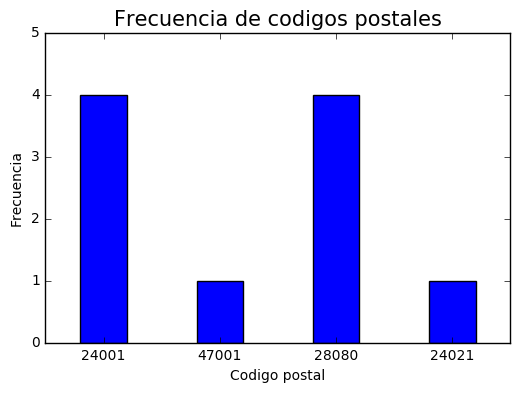

In [254]:
%%local
%matplotlib inline
import matplotlib.pyplot as plt

bar_width = 0.4
bars = range(len(cpostalPD["frecuencia"]))
xlabel = "Codigo postal"
ylabel = "Frecuencia"
title = "Frecuencia de codigos postales"

fig, axes = plt.subplots(1, 1)
axes.bar(bars, cpostalPD["frecuencia"], bar_width, align='center')
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
axes.set_xticklabels(cpostalPD["CODIGO POSTAL"])
axes.set_xticks(bars)
axes.set_yticks(range(6))
axes.set_title(title, size = 15)
plt.show()

# Y finalmente... buenas prácticas

In [77]:
# https://www.gitbook.com/book/umbertogriffo/apache-spark-best-practices-and-tuning/details
# https://www.regular-expressions.info/refmodifiers.html